In [124]:
!pip install plot_keras_history
!pip install statsmodels==0.10.1

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [1334 lines of output]
  C:\Users\61723\AppData\Local\Temp\pip-install-sguyn4xe\statsmodels_05f90fbcffa443f5b4d9f4ba837e0fda\setup.py:14: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    import pkg_resources
  C:\Users\61723\AppData\Local\Temp\pip-install-sguyn4xe\statsmodels_05f90fbcffa443f5b4d9f4ba837e0fda\setup.py:50: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    req_ver = LooseVersion(SETUP_REQUIREMENTS[key])
  C:\Users\61723\AppData\Local\Temp\pip-install-sguyn4xe\statsmodels_05f90fbcffa443f5b4d9f4ba837e0fda\setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    ver = LooseVersion(mod.__version__)
  C:\Users\61723\AppData\Local\Temp\pip-install-sguyn4xe\statsmodels_05f90fbcffa443f5b4d9f4ba


  Using cached statsmodels-0.10.1.tar.gz (14.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for statsmodels
Failed to build statsmodels


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import datetime
import statsmodels.api as sm
from pylab import rcParams
from datetime import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

rcParams['figure.figsize'] = 18, 10

In [126]:
import tensorflow as tf
import random as python_random

def reset_seeds():
  python_random.seed(49)
  np.random.seed(49) 
  tf.random.set_seed(49)

reset_seeds() 

In [127]:
df=pd.read_csv('C:/Users/61723/Desktop/Coal Price Prediction.csv')
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df = df.sort_values(by='Date')
df = df.set_index('Date')
df.index=pd.to_datetime(df.index.strftime("%Y-%d-%m"))

In [128]:
df.head()

,Colombia coal price,Global coal price,Crude Oil,Diesel,Gasoline,Natural Gas,Coal Producer Index,Gold,Silver,Copper,Iron Ore,Crude Oil Index,Metal Index,Non-Fuel Index,Commodity Index,Consumer confidence index,Business confidence index
Date,,,,,,,,,,,,,,,,,
2007-01-01,51.19,51.29,53.52,1.63,1.43,6.58,138.8,631.17,12.84,5669.66,78.20,116.85,96.83,80.64,73.21,101.14,100.95
2007-02-01,52.70,52.90,57.56,1.76,1.64,7.97,139.9,664.75,13.91,5676.45,82.66,124.72,98.69,82.68,79.39,101.08,101.02
2007-03-01,53.59,55.38,60.60,1.89,1.94,7.12,142.1,654.90,13.18,6452.48,88.55,130.38,104.59,84.65,81.55,101.00,101.07
2007-04-01,51.94,56.12,65.06,2.05,2.11,7.59,141.6,679.37,13.72,7766.47,91.26,138.96,114.38,87.98,86.79,100.98,101.09
2007-05-01,51.30,56.00,65.16,2.04,2.25,7.61,140.2,667.31,13.15,7681.42,102.02,139.33,116.38,89.71,86.92,101.00,101.09


In [129]:
# Checking number of NaN values
nan_values_array = []
for column in df:
     nan_values_array.append(df[column].isnull().sum())
     
column_names = list(df.columns.values)
data = {'Feature':column_names,'Number of NaN values':nan_values_array}
nan_values = pd.DataFrame(data)
print(nan_values)

                      Feature  Number of NaN values
0         Colombia coal price                     0
1           Global coal price                     0
2                   Crude Oil                     0
3                      Diesel                     0
4                    Gasoline                     0
5                 Natural Gas                     0
6         Coal Producer Index                     0
7                        Gold                     0
8                      Silver                     0
9                      Copper                     0
10                   Iron Ore                     0
11            Crude Oil Index                     0
12                Metal Index                     0
13             Non-Fuel Index                     0
14            Commodity Index                     0
15  Consumer confidence index                     0
16  Business confidence index                     0


In [130]:
#Default of this method is 'Pearson'
df.corr()

,Colombia coal price,Global coal price,Crude Oil,Diesel,Gasoline,Natural Gas,Coal Producer Index,Gold,Silver,Copper,Iron Ore,Crude Oil Index,Metal Index,Non-Fuel Index,Commodity Index,Consumer confidence index,Business confidence index
Colombia coal price,1.000000,0.945169,0.616003,0.646513,0.557782,0.499044,0.022990,0.165402,0.428600,0.580685,0.720831,0.592989,0.630448,0.747743,0.663855,-0.541523,0.042781
Global coal price,0.945169,1.000000,0.643826,0.649234,0.579500,0.422633,0.122901,0.257209,0.480339,0.643363,0.748662,0.622281,0.653745,0.775497,0.680869,-0.533166,0.084169
Crude Oil,0.616003,0.643826,1.000000,0.984334,0.975603,0.360217,0.217329,0.393097,0.626702,0.808229,0.807661,0.995438,0.735818,0.890749,0.994192,-0.456354,0.155853
Diesel,0.646513,0.649234,0.984334,1.000000,0.969020,0.392864,0.202151,0.392082,0.619839,0.799010,0.790095,0.982096,0.731855,0.888983,0.985239,-0.444402,0.162404
Gasoline,0.557782,0.579500,0.975603,0.969020,1.000000,0.275445,0.260227,0.458292,0.672673,0.822693,0.744460,0.980984,0.720967,0.873045,0.959243,-0.356033,0.230220
Natural Gas,0.499044,0.422633,0.360217,0.392864,0.275445,1.000000,-0.688016,-0.589985,-0.251086,0.276354,0.515792,0.307782,0.549593,0.323319,0.448934,-0.285642,-0.038574
Coal Producer Index,0.022990,0.122901,0.217329,0.202151,0.260227,-0.688016,1.000000,0.860086,0.594892,0.108131,-0.079704,0.267952,-0.226852,0.220513,0.147481,-0.169333,-0.012903
Gold,0.165402,0.257209,0.393097,0.392082,0.458292,-0.589985,0.860086,1.000000,0.849834,0.387328,0.175146,0.435323,0.089238,0.464090,0.321404,-0.123482,0.203360
Silver,0.428600,0.480339,0.626702,0.619839,0.672673,-0.251086,0.594892,0.849834,1.000000,0.684784,0.519789,0.636936,0.488719,0.766992,0.579401,-0.288226,0.227096
Copper,0.580685,0.643363,0.808229,0.799010,0.822693,0.276354,0.108131,0.387328,0.684784,1.000000,0.816801,0.801278,0.926818,0.906074,0.797015,-0.130837,0.511643


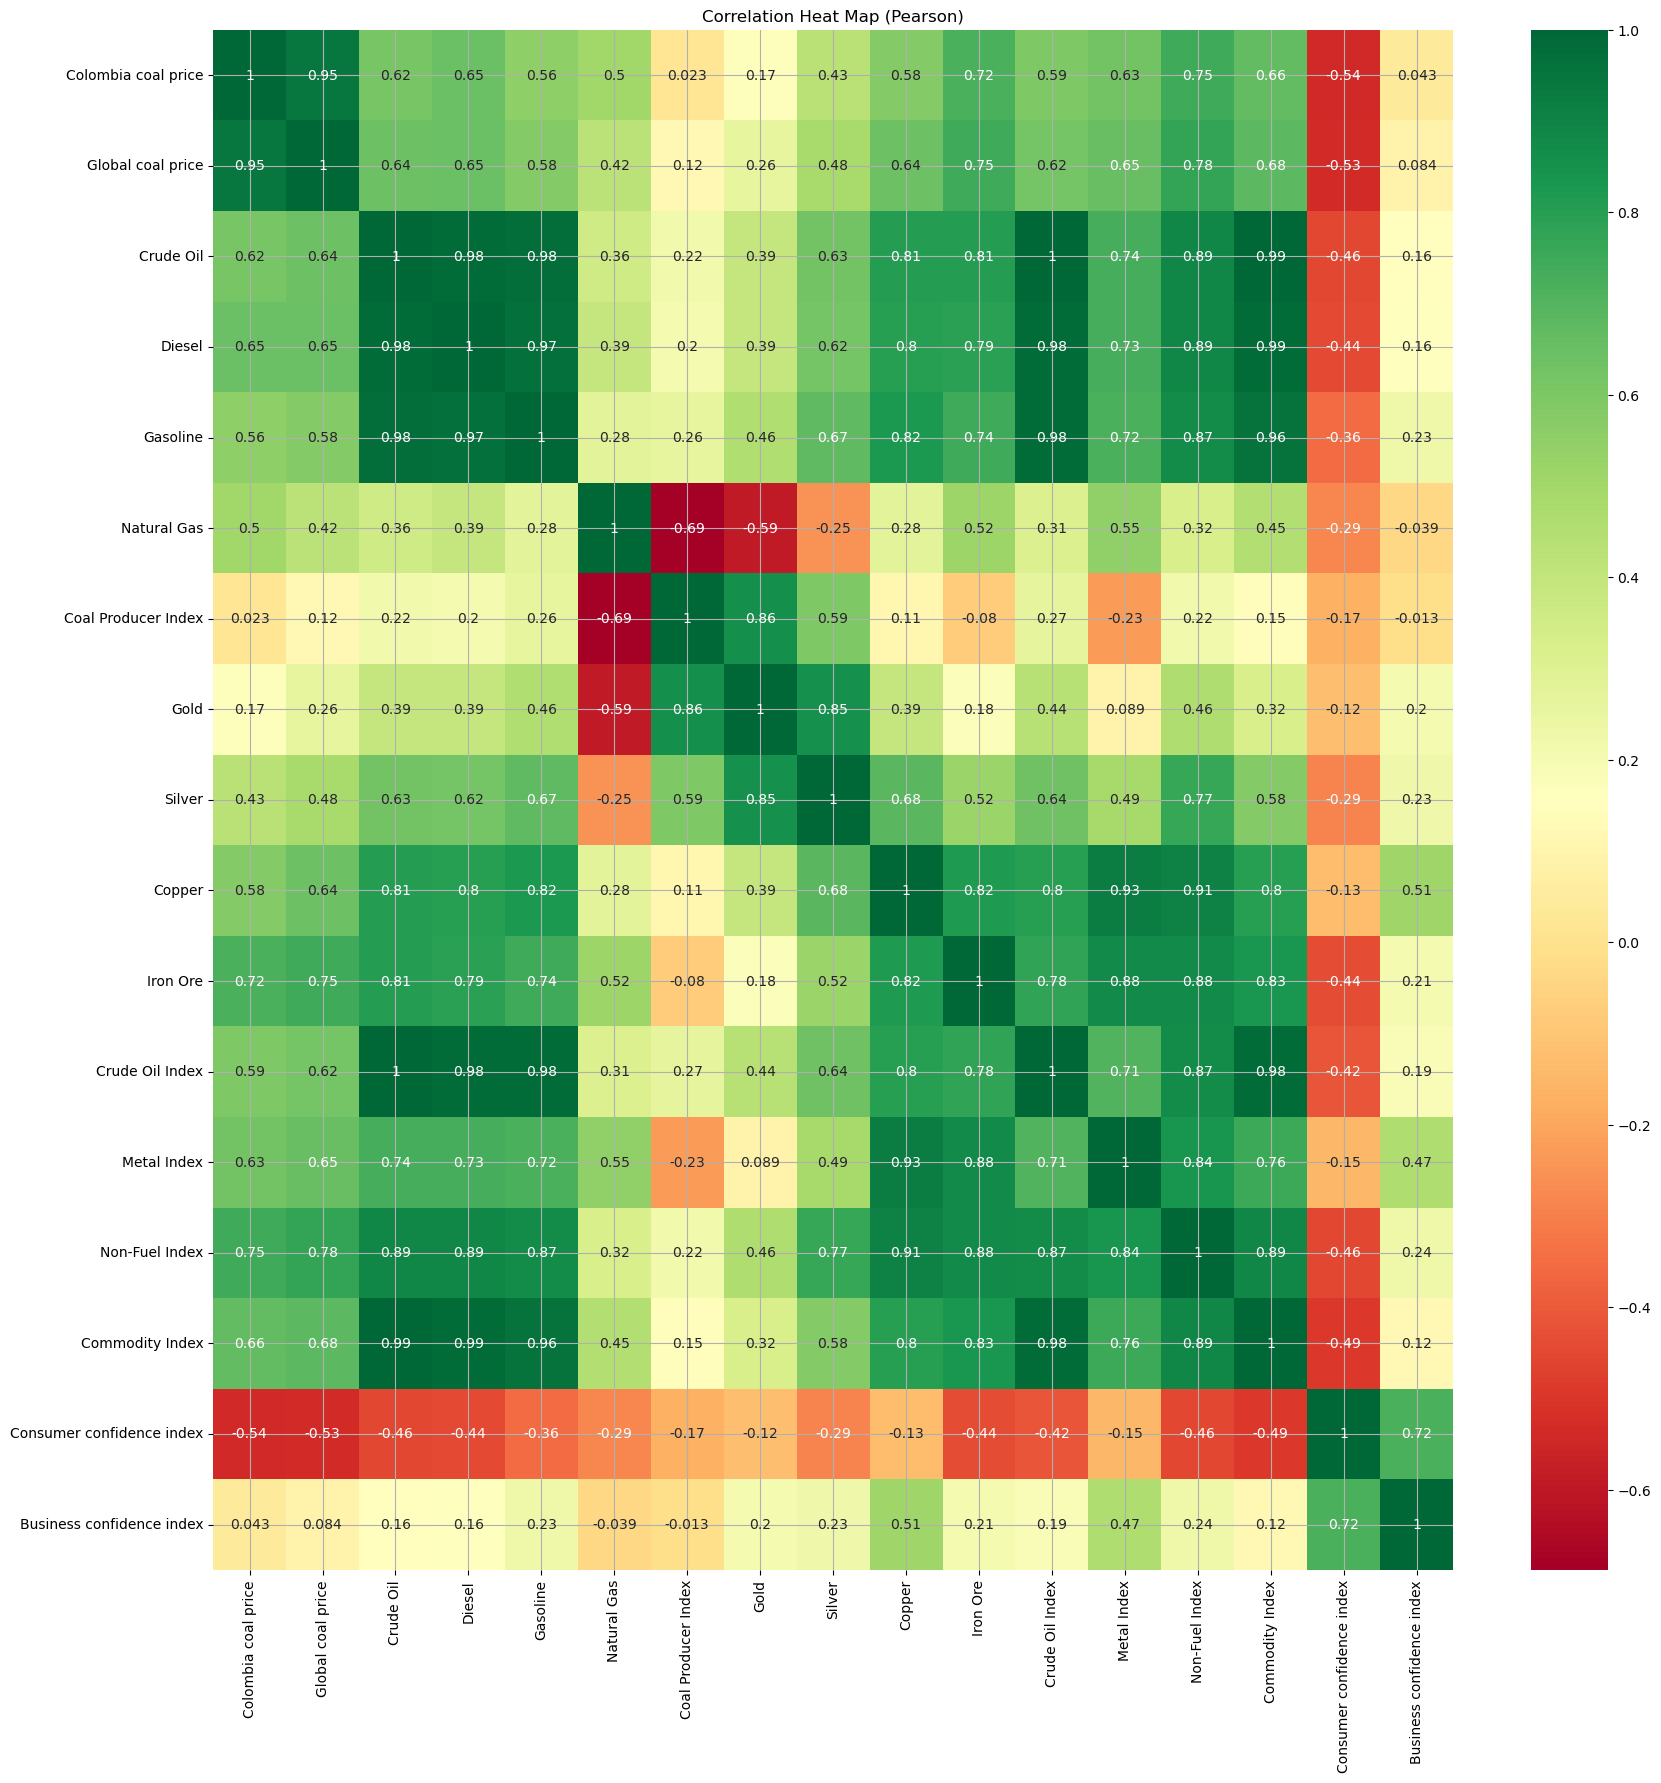

In [131]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn").set_title("Correlation Heat Map (Pearson)")

In [132]:
df.corr(method='spearman')

,Colombia coal price,Global coal price,Crude Oil,Diesel,Gasoline,Natural Gas,Coal Producer Index,Gold,Silver,Copper,Iron Ore,Crude Oil Index,Metal Index,Non-Fuel Index,Commodity Index,Consumer confidence index,Business confidence index
Colombia coal price,1.000000,0.917819,0.589726,0.632483,0.559765,0.319529,0.258937,0.343569,0.486454,0.628264,0.723901,0.575838,0.605149,0.713364,0.631179,-0.505928,0.121451
Global coal price,0.917819,1.000000,0.612083,0.630810,0.568368,0.297157,0.245586,0.370206,0.546055,0.675009,0.752496,0.592263,0.639149,0.741418,0.642653,-0.534427,0.059209
Crude Oil,0.589726,0.612083,1.000000,0.973405,0.967733,0.370464,0.447364,0.426352,0.660482,0.823630,0.803855,0.991194,0.733520,0.911988,0.989787,-0.512527,-0.011901
Diesel,0.632483,0.630810,0.973405,1.000000,0.959831,0.384155,0.443512,0.419478,0.642602,0.846982,0.808133,0.966915,0.754768,0.918678,0.977076,-0.505633,-0.025352
Gasoline,0.559765,0.568368,0.967733,0.959831,1.000000,0.315969,0.484571,0.470725,0.669354,0.837354,0.766946,0.971830,0.734089,0.905934,0.953702,-0.446154,0.012988
Natural Gas,0.319529,0.297157,0.370464,0.384155,0.315969,1.000000,-0.449609,-0.450695,-0.160147,0.342529,0.567233,0.328367,0.560907,0.356302,0.443031,-0.263965,0.138510
Coal Producer Index,0.258937,0.245586,0.447364,0.443512,0.484571,-0.449609,1.000000,0.891188,0.789981,0.340895,0.139748,0.490529,0.053513,0.434800,0.391234,-0.172039,-0.023420
Gold,0.343569,0.370206,0.426352,0.419478,0.470725,-0.450695,0.891188,1.000000,0.903779,0.416471,0.211387,0.455845,0.146718,0.493451,0.370908,-0.202116,0.034096
Silver,0.486454,0.546055,0.660482,0.642602,0.669354,-0.160147,0.789981,0.903779,1.000000,0.646810,0.508719,0.671368,0.434517,0.729351,0.614280,-0.340975,0.062464
Copper,0.628264,0.675009,0.823630,0.846982,0.837354,0.342529,0.340895,0.416471,0.646810,1.000000,0.853391,0.805461,0.919862,0.927719,0.818633,-0.341358,0.220332


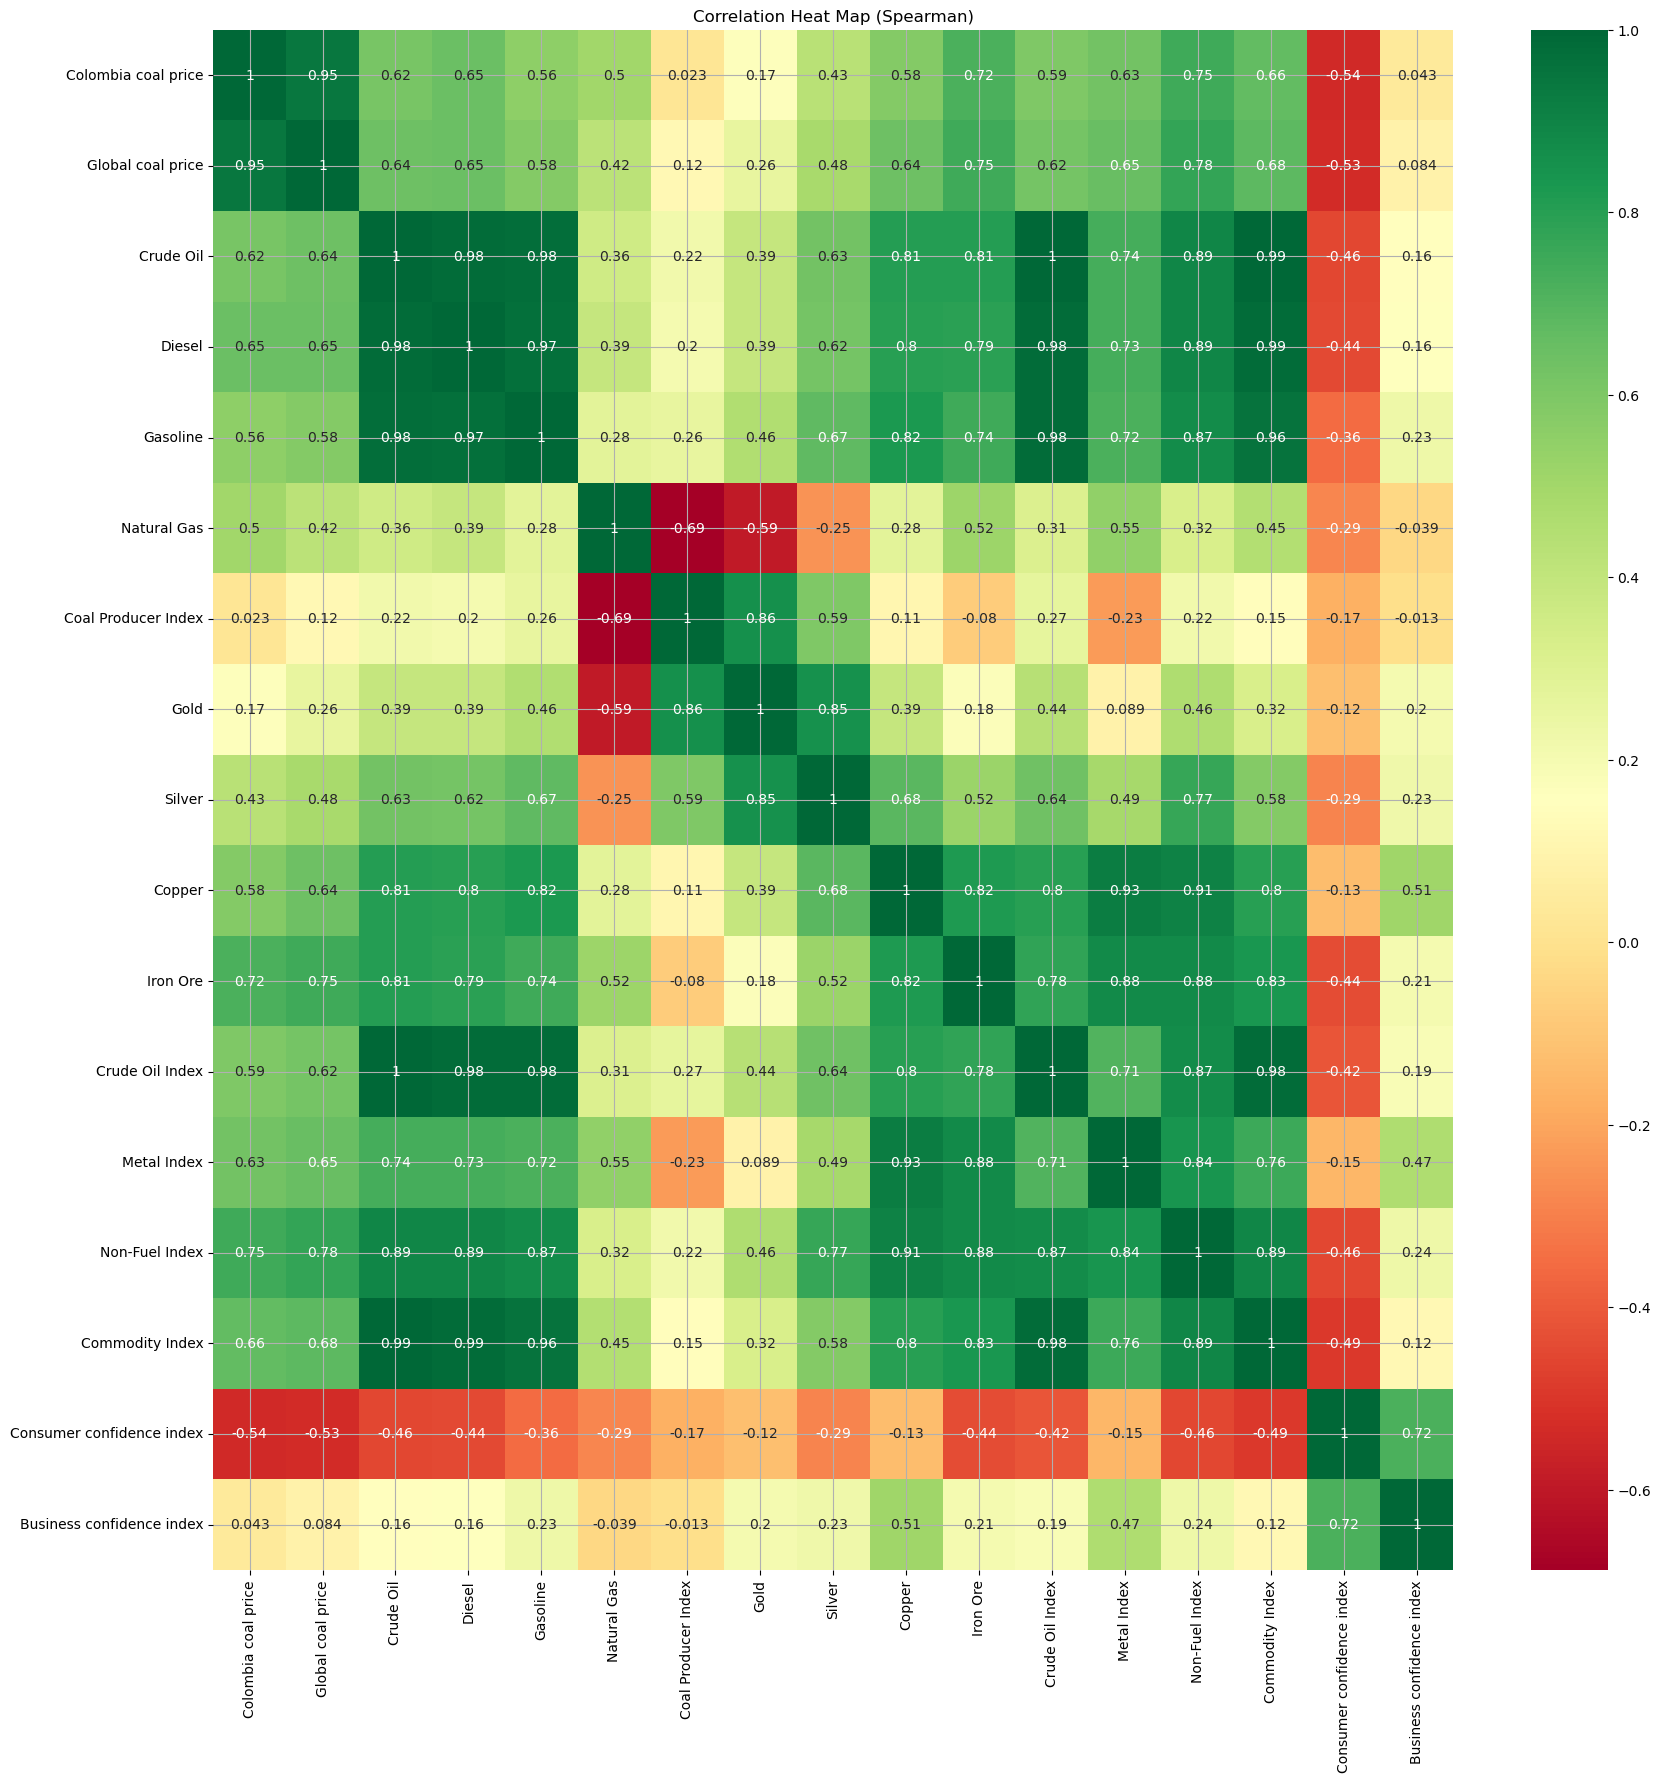

In [133]:
corrmat_spearman = df.corr(method='spearman')
top_corr_features = corrmat_spearman.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn").set_title("Correlation Heat Map (Spearman)")

In [134]:
# Correlation with output variable
cor_target = abs(corrmat["Colombia coal price"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

Colombia coal price          1.000000
Global coal price            0.945169
Crude Oil                    0.616003
Diesel                       0.646513
Gasoline                     0.557782
Copper                       0.580685
Iron Ore                     0.720831
Crude Oil Index              0.592989
Metal Index                  0.630448
Non-Fuel Index               0.747743
Commodity Index              0.663855
Consumer confidence index    0.541523
Name: Colombia coal price, dtype: float64


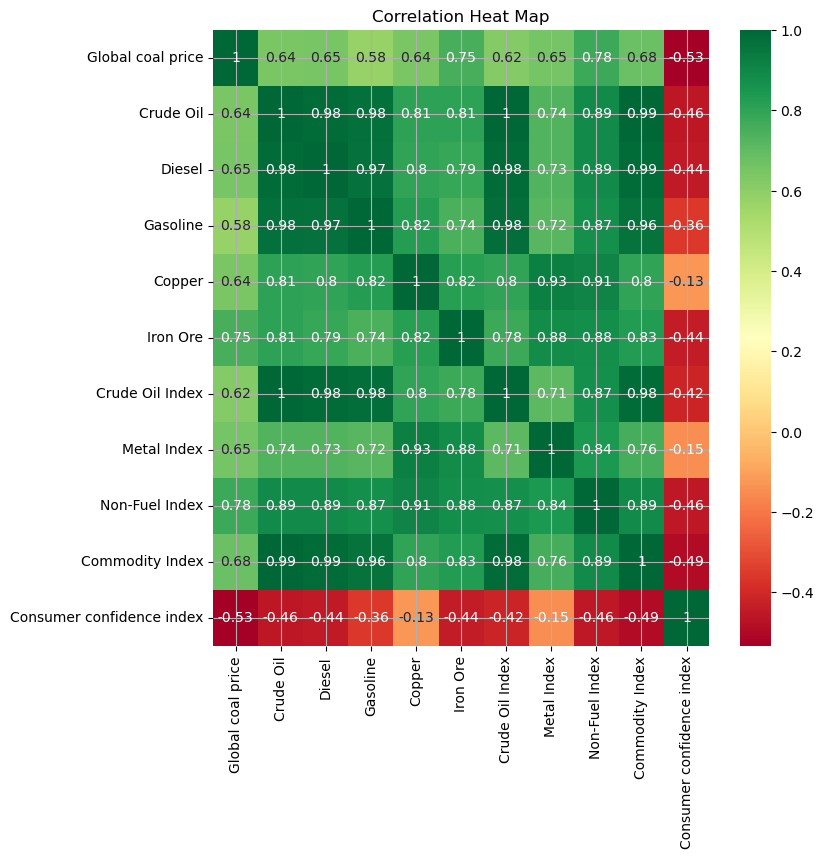

In [135]:
rf_df = df[['Global coal price','Crude Oil','Diesel','Gasoline', 'Copper','Iron Ore','Crude Oil Index','Metal Index','Non-Fuel Index','Commodity Index','Consumer confidence index']]
fig, ax = plt.subplots(figsize=(8,8))
h=sns.heatmap(rf_df.corr(),annot=True,cmap="RdYlGn",ax=ax).set_title("Correlation Heat Map")

In [136]:
#(crude oil,Diesel) (crude oil,gasoline) (crude oil,commodity index) (Diesel,gasoline)(Diesel,crude oil index)(Diesel, commodity index)(gasoline, crude oil index)(gasoline, commodity index)(copper, metal index)(copper,non-fuel index)(crude oil index, commodity index)

Text(0.5, 1.0, 'Crude oil vs. Commodity Index')

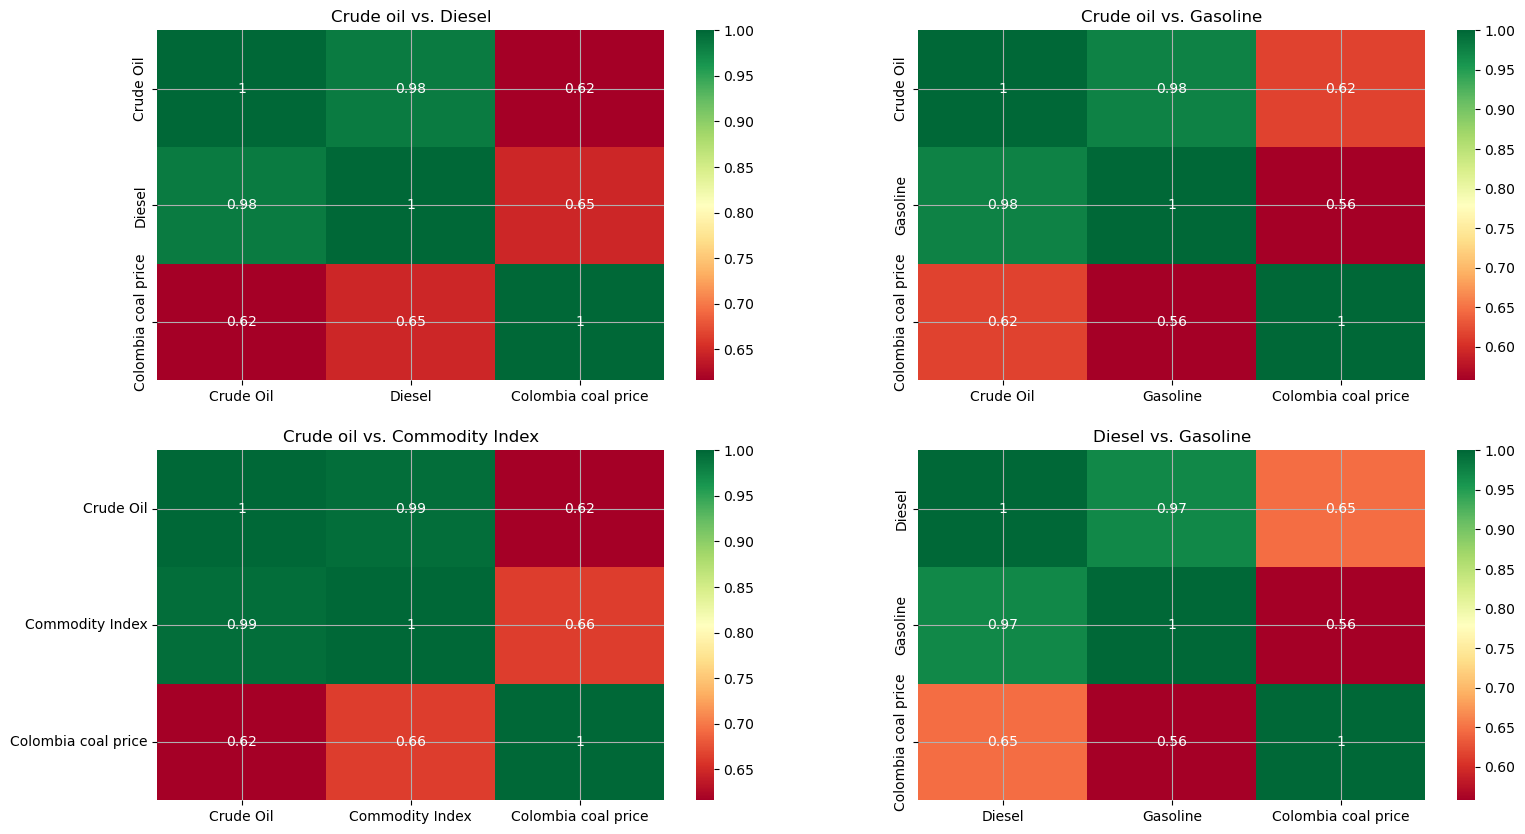

In [137]:
fig2,ax2 = plt.subplots(2,2)
sns.heatmap(df[['Crude Oil','Diesel','Colombia coal price']].corr(),ax=ax2[0][0],annot=True,cmap="RdYlGn").set_title('Crude oil vs. Diesel')
sns.heatmap(df[['Crude Oil','Gasoline','Colombia coal price']].corr(),ax=ax2[0][1],annot=True,cmap="RdYlGn").set_title('Crude oil vs. Gasoline')
sns.heatmap(df[['Diesel','Gasoline','Colombia coal price']].corr(),ax=ax2[1][1],annot=True,cmap="RdYlGn").set_title('Diesel vs. Gasoline')
sns.heatmap(df[['Crude Oil','Commodity Index','Colombia coal price']].corr(),ax=ax2[1][0],annot=True,cmap="RdYlGn").set_title('Crude oil vs. Commodity Index')

Text(0.5, 1.0, 'Gasoline vs.Commodity Index')

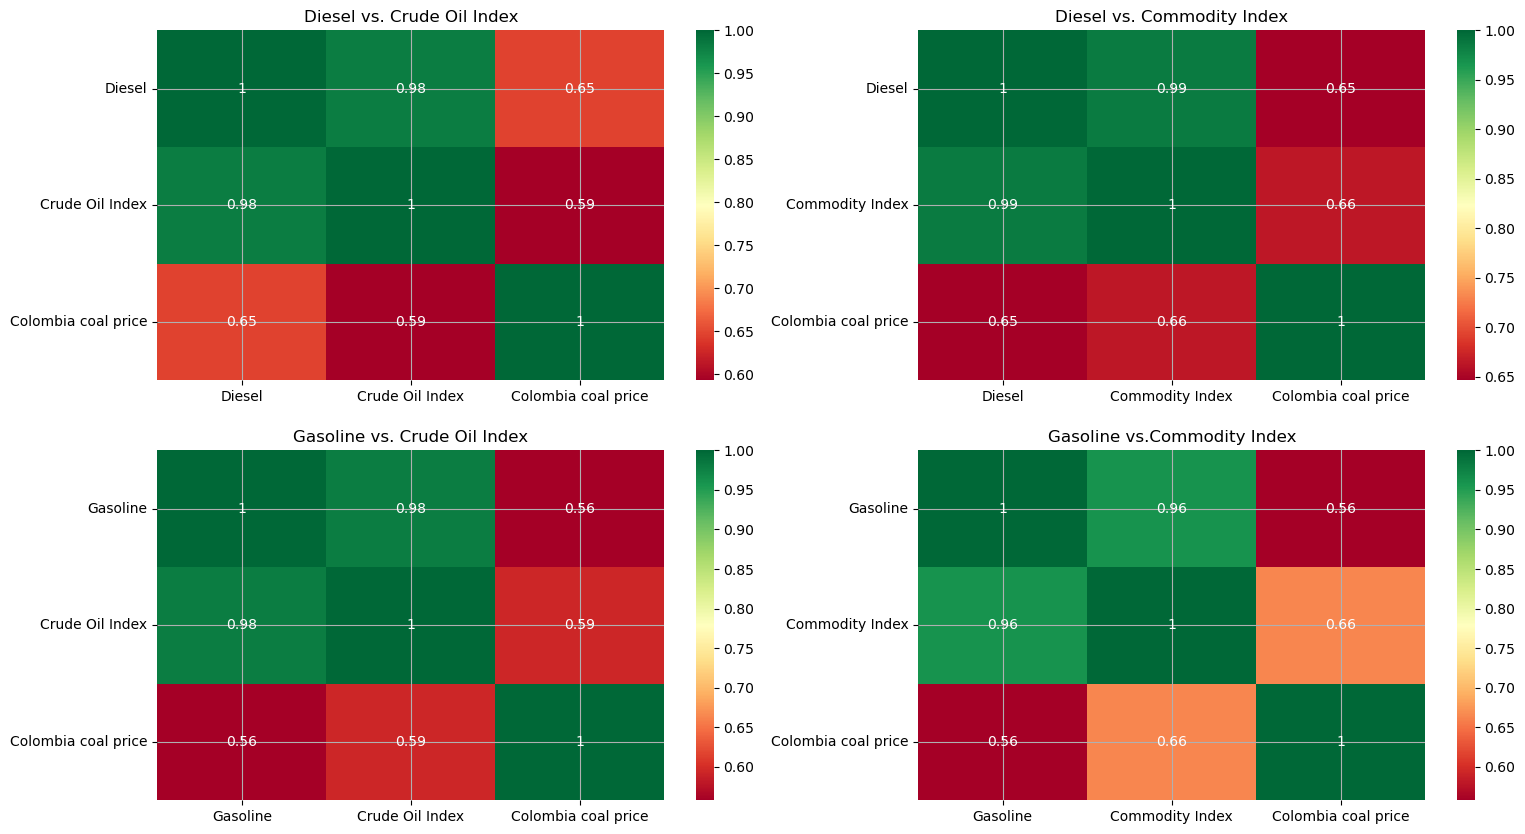

In [138]:
fig3,ax3 = plt.subplots(2,2)
sns.heatmap(df[['Diesel','Crude Oil Index','Colombia coal price']].corr(),ax=ax3[0][0],annot=True,cmap="RdYlGn").set_title('Diesel vs. Crude Oil Index')
sns.heatmap(df[['Diesel','Commodity Index','Colombia coal price']].corr(),ax=ax3[0][1],annot=True,cmap="RdYlGn").set_title('Diesel vs. Commodity Index')
sns.heatmap(df[['Gasoline','Crude Oil Index','Colombia coal price']].corr(),ax=ax3[1][0],annot=True,cmap="RdYlGn").set_title('Gasoline vs. Crude Oil Index')
sns.heatmap(df[['Gasoline','Commodity Index','Colombia coal price']].corr(),ax=ax3[1][1],annot=True,cmap="RdYlGn").set_title('Gasoline vs.Commodity Index')

Text(0.5, 1.0, 'Crude Oil Index vs.Commodity Index')

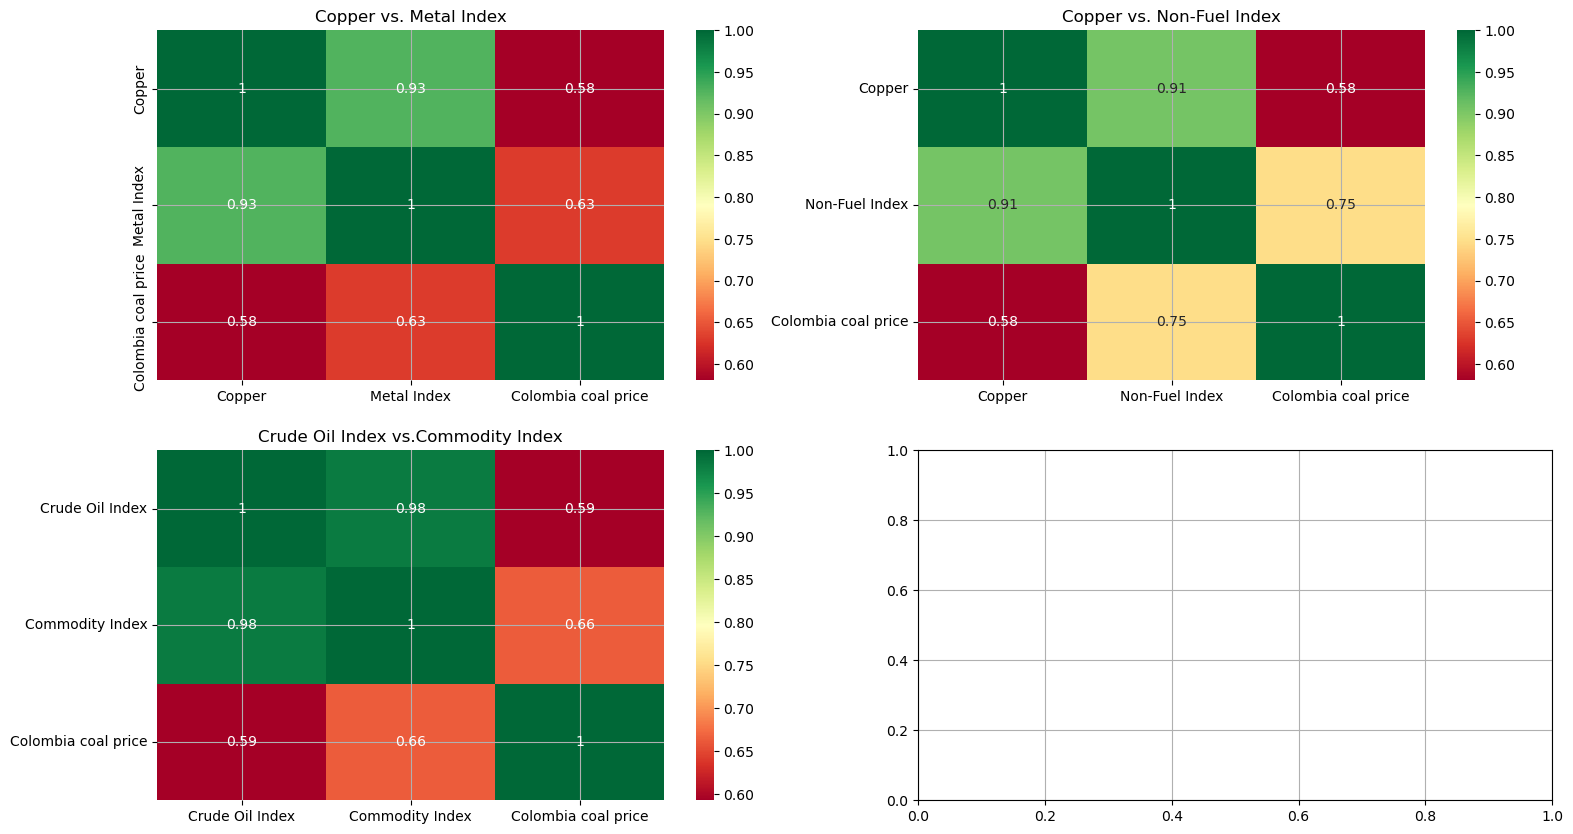

In [139]:
fig4,ax4 = plt.subplots(2,2)
sns.heatmap(df[['Copper', 'Metal Index','Colombia coal price']].corr(),ax=ax4[0][0],annot=True,cmap="RdYlGn").set_title('Copper vs. Metal Index')
sns.heatmap(df[['Copper','Non-Fuel Index','Colombia coal price']].corr(),ax=ax4[0][1],annot=True,cmap="RdYlGn").set_title('Copper vs. Non-Fuel Index')
sns.heatmap(df[['Crude Oil Index','Commodity Index','Colombia coal price']].corr(),ax=ax4[1][0],annot=True,cmap="RdYlGn").set_title('Crude Oil Index vs.Commodity Index')

In [140]:

df.shape

(132, 17)

In [141]:
df.drop(['Gasoline','Diesel','Crude Oil Index','Iron Ore','Copper','Crude Oil','Business confidence index','Natural Gas','Gold','Silver','Coal Producer Index','Consumer confidence index'], axis=1,inplace=True)
df.head()
df.shape

(132, 5)

In [142]:
df.columns

Index(['Colombia coal price', 'Global coal price', 'Metal Index',
       'Non-Fuel Index', 'Commodity Index'],
      dtype='object')

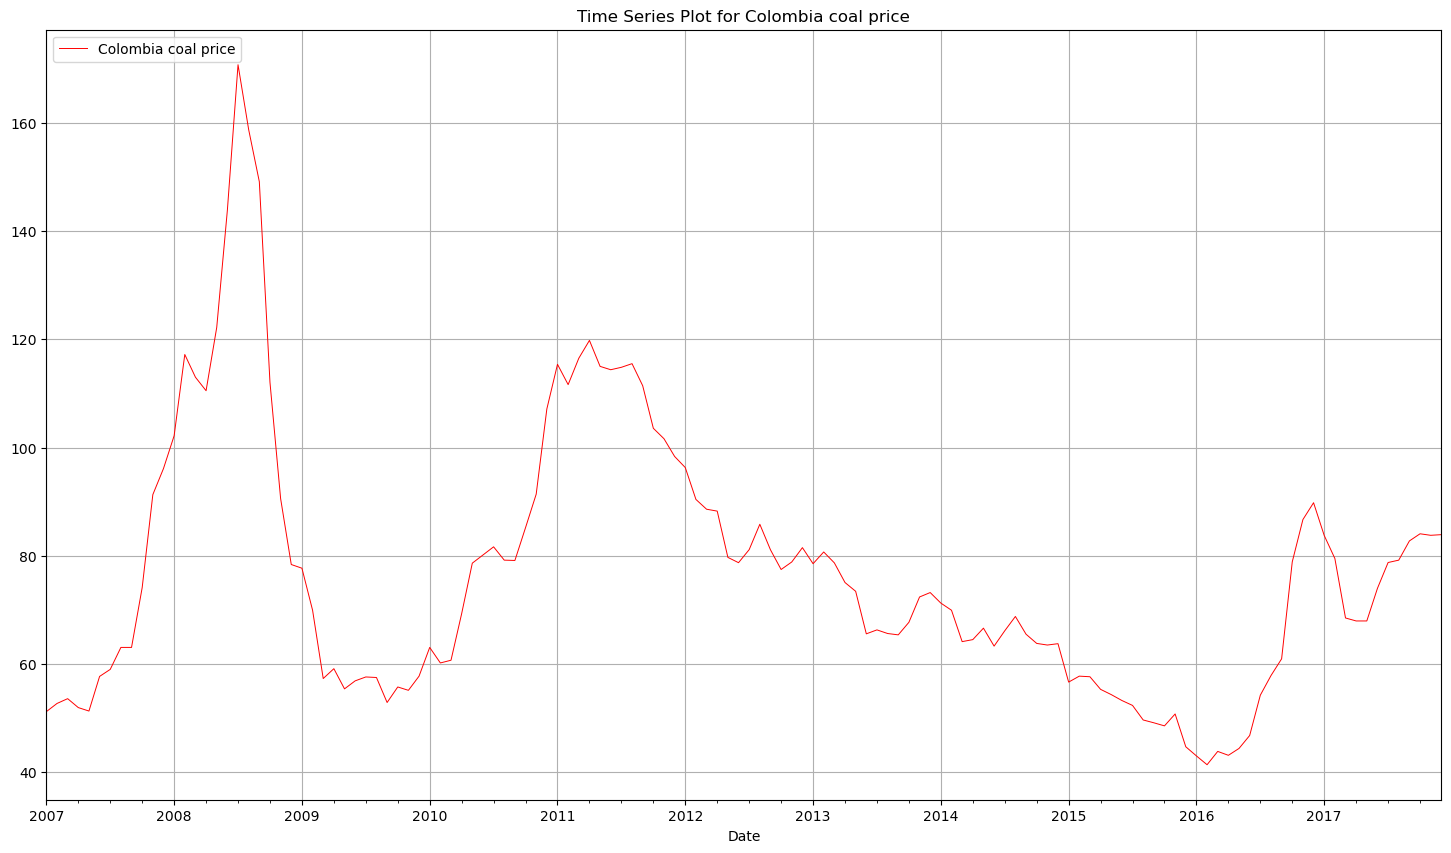

In [143]:
df["Colombia coal price"].plot(linewidth=0.7, color='red')
plt.legend(df[["Colombia coal price"]], loc ="upper left") 
plt.title("Time Series Plot for Colombia coal price")
plt.show()

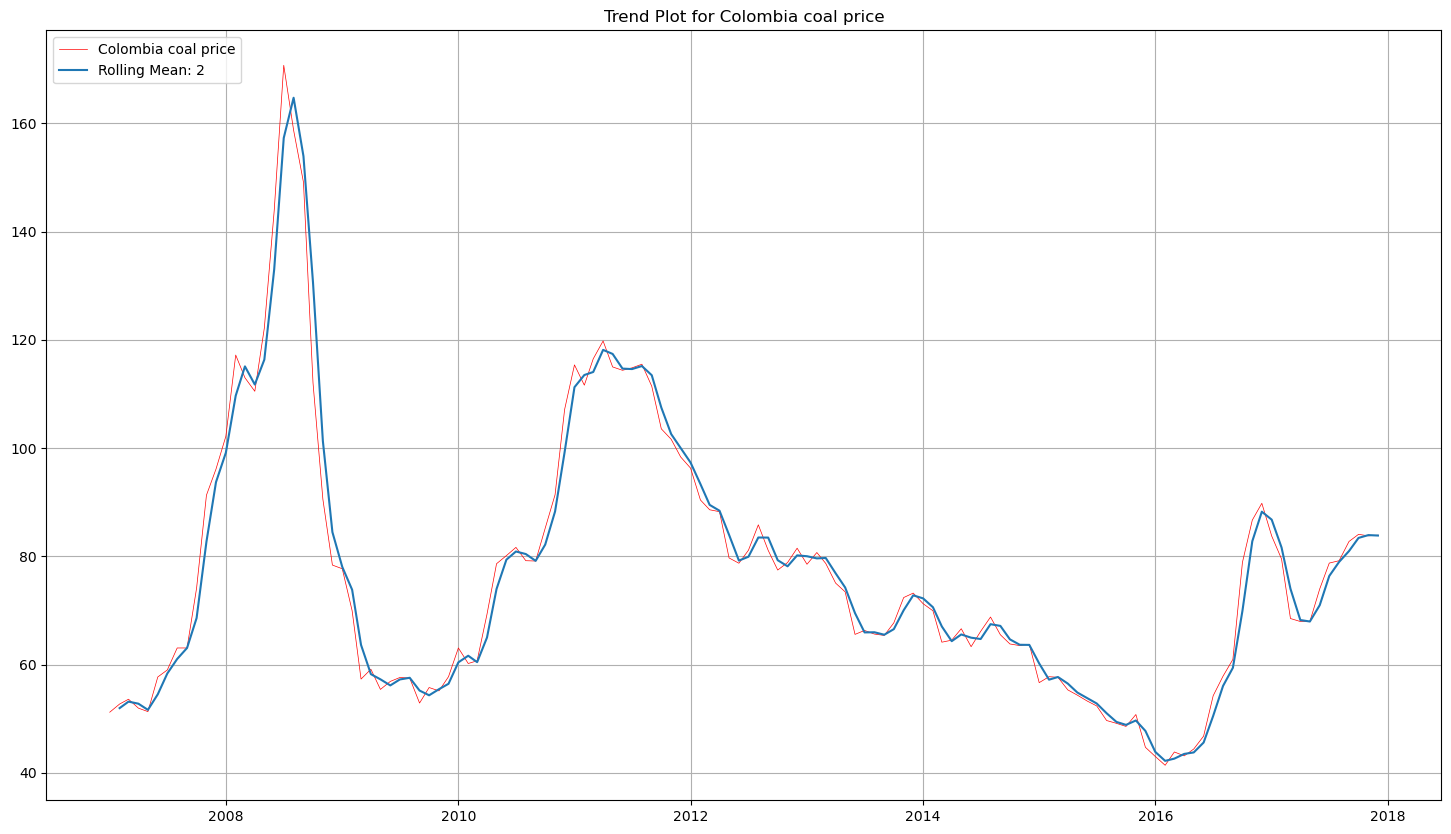

In [144]:
plt.plot(df.index, df["Colombia coal price"], linewidth=0.5, color='red')
plt.plot(pd.Series.rolling(df["Colombia coal price"], 2).mean())
plt.legend(["Colombia coal price", "Rolling Mean: 2"], loc ="upper left") 
plt.title("Trend Plot for Colombia coal price")
plt.show()

In [145]:
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month

<Axes: title={'center': 'Seasonal plot of Colombia coal price'}, xlabel='Month', ylabel='Seasonal Plot for Colombia coal price'>

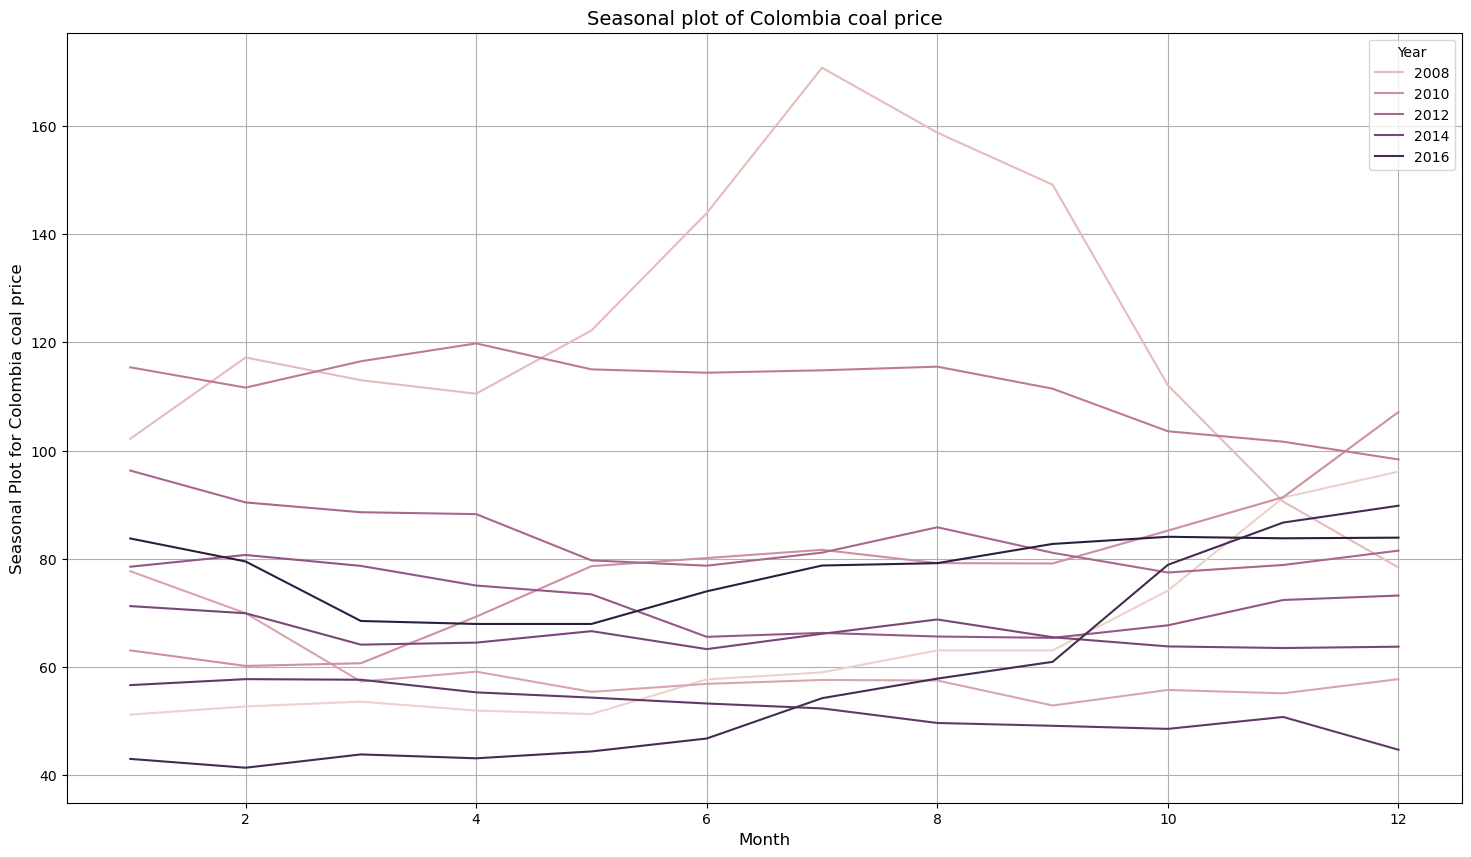

In [146]:
fig, ax = plt.subplots()
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Seasonal Plot for Colombia coal price', fontsize = 12)
ax.set_title('Seasonal plot of Colombia coal price', fontsize = 14, loc='center')
sns.lineplot(x=df['Month'], y=df["Colombia coal price"], hue=df['Year'])

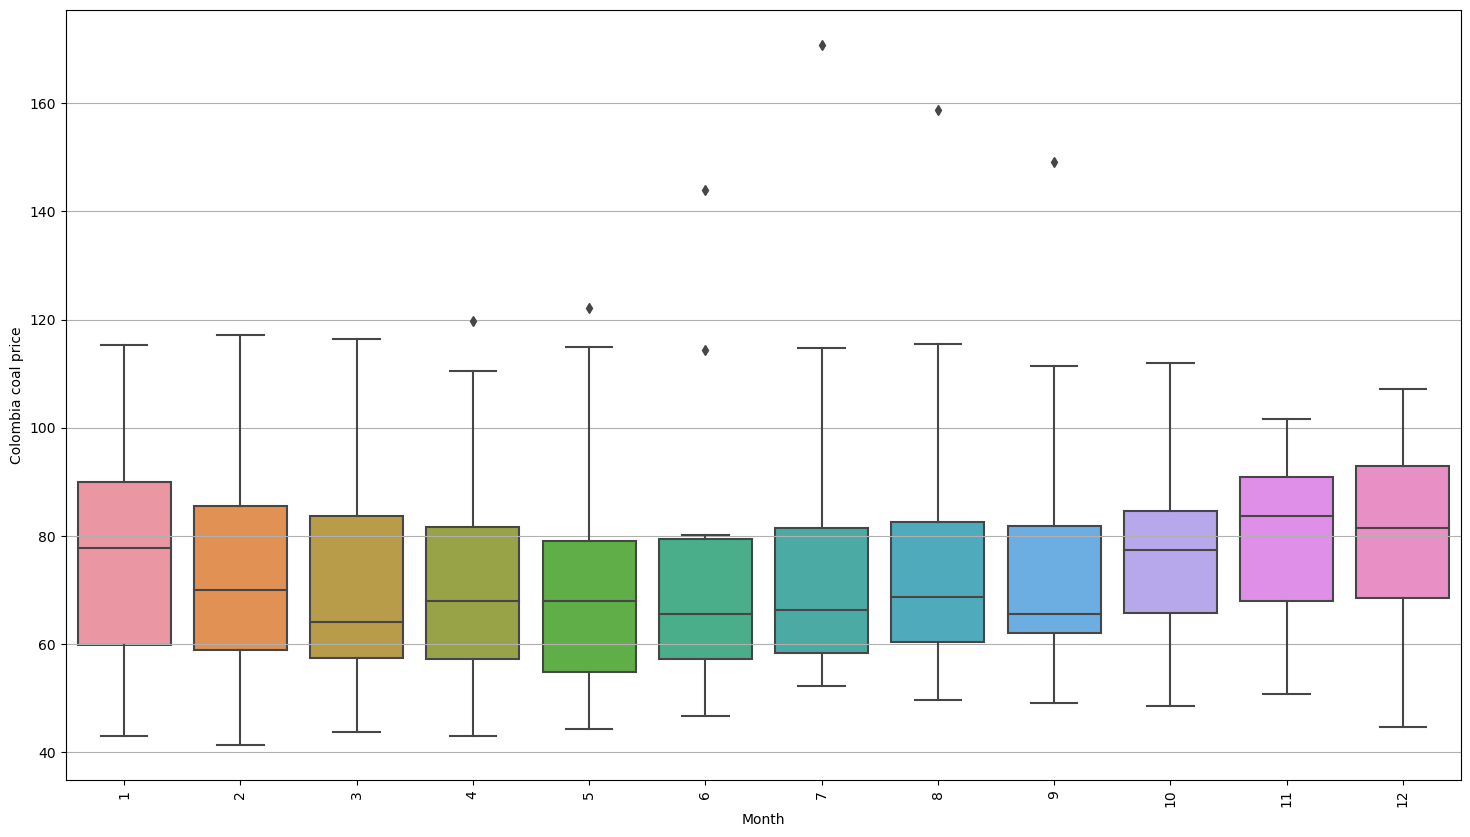

In [147]:
ax = sns.boxplot(data=df, x='Month', y='Colombia coal price')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

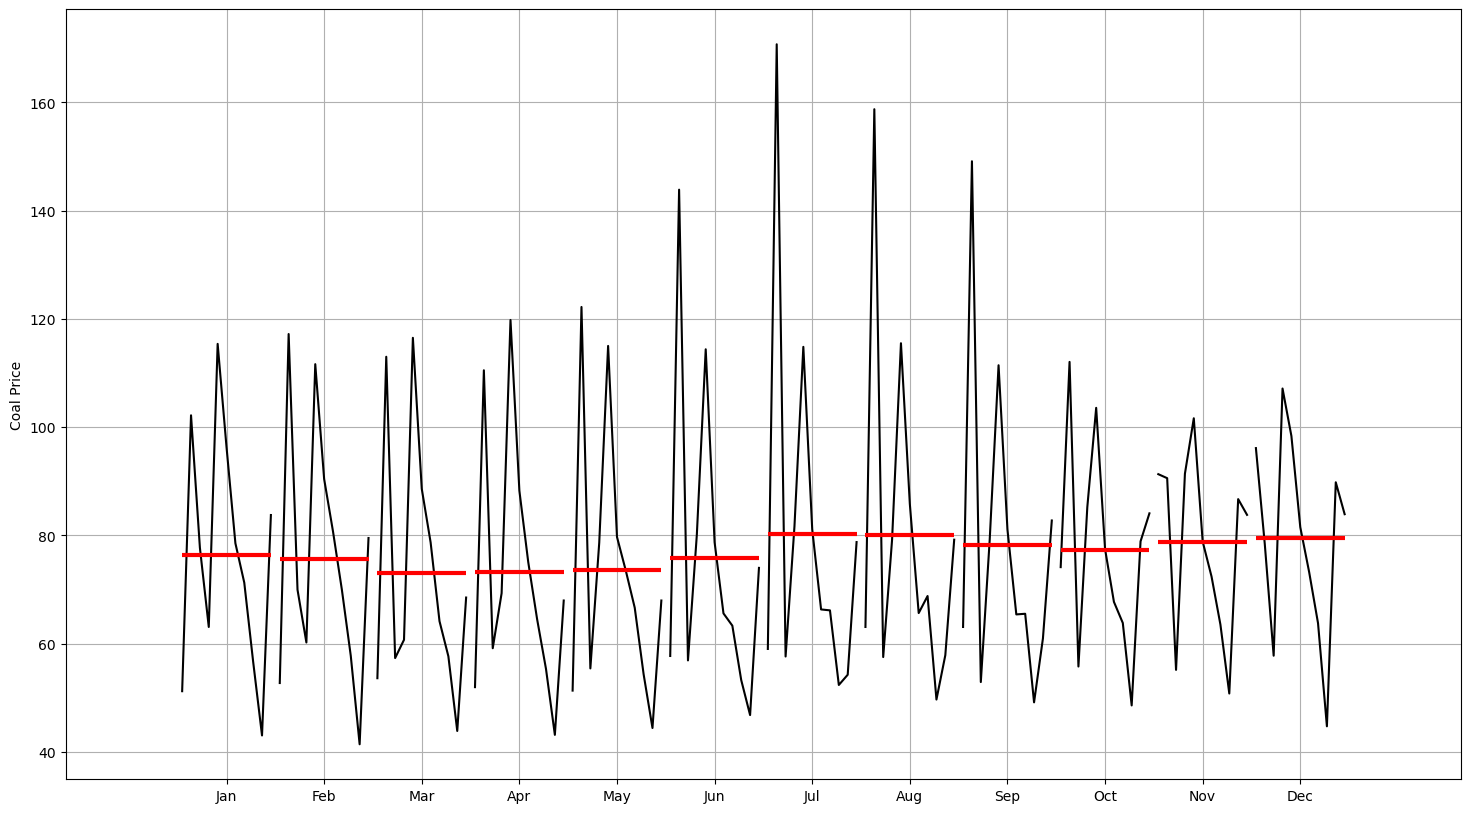

In [148]:
month_plot(df["Colombia coal price"],ylabel='Coal Price');

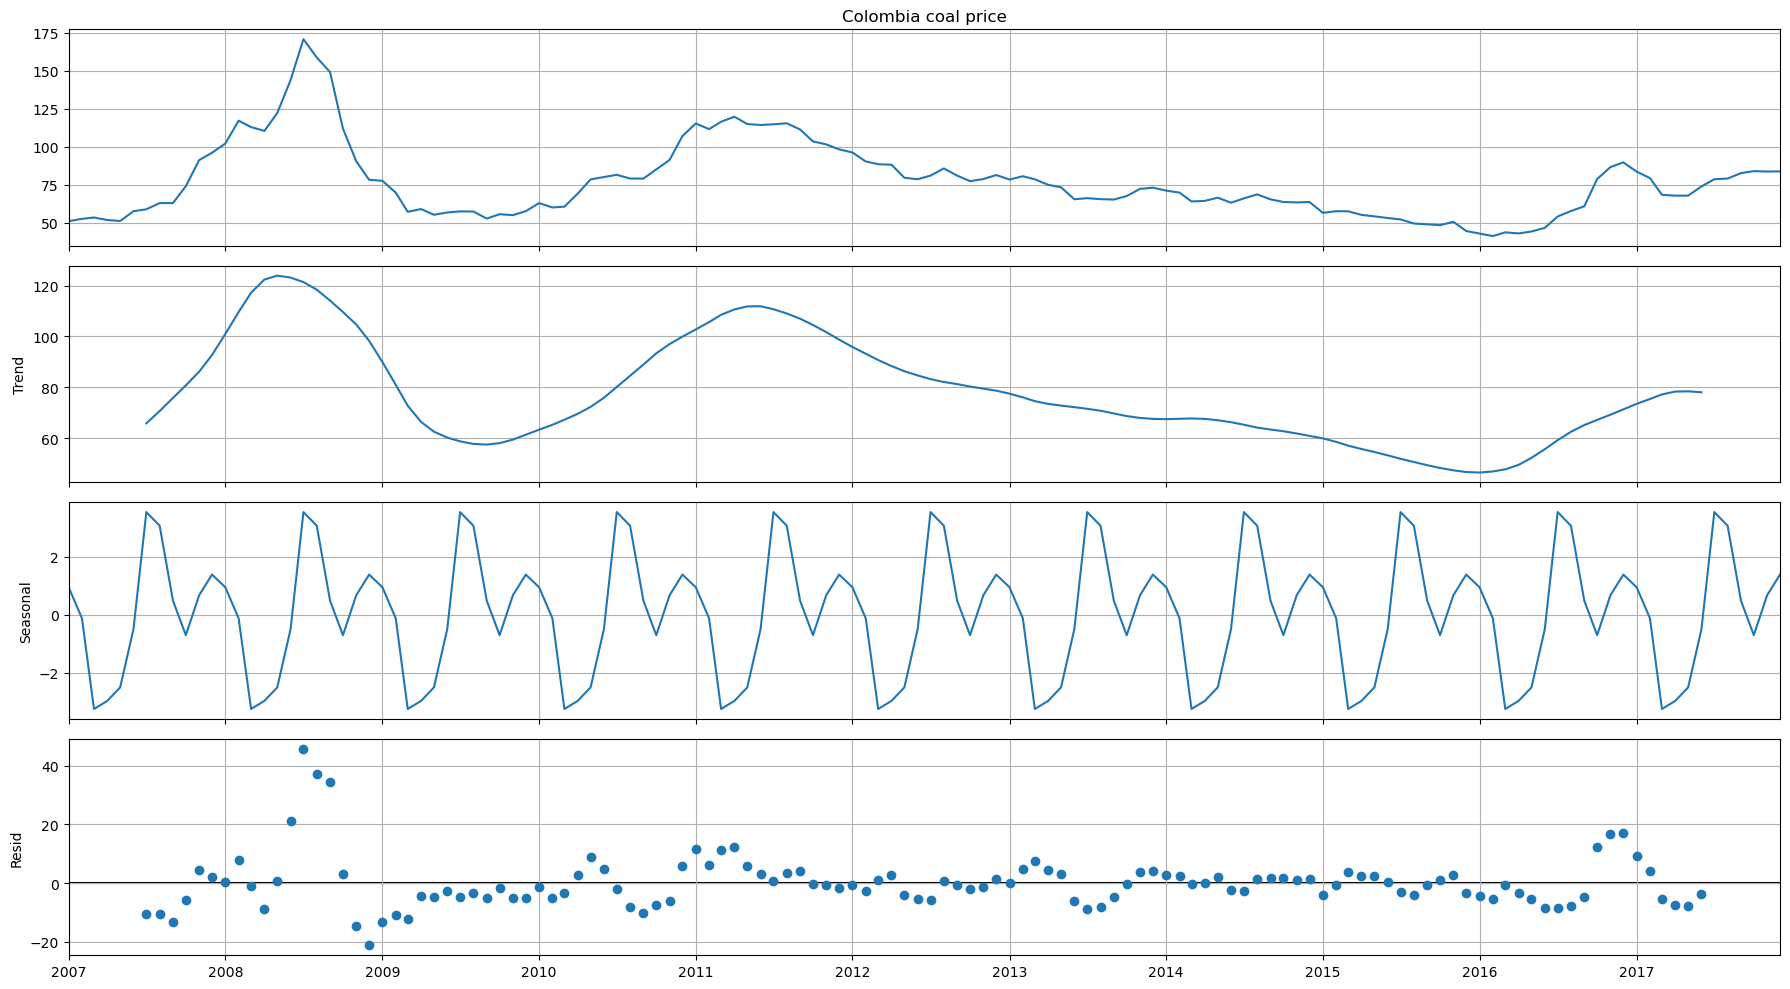

In [149]:
cls_decomposition = sm.tsa.seasonal_decompose(df["Colombia coal price"], model='additive')
fig = cls_decomposition.plot()
plt.show()

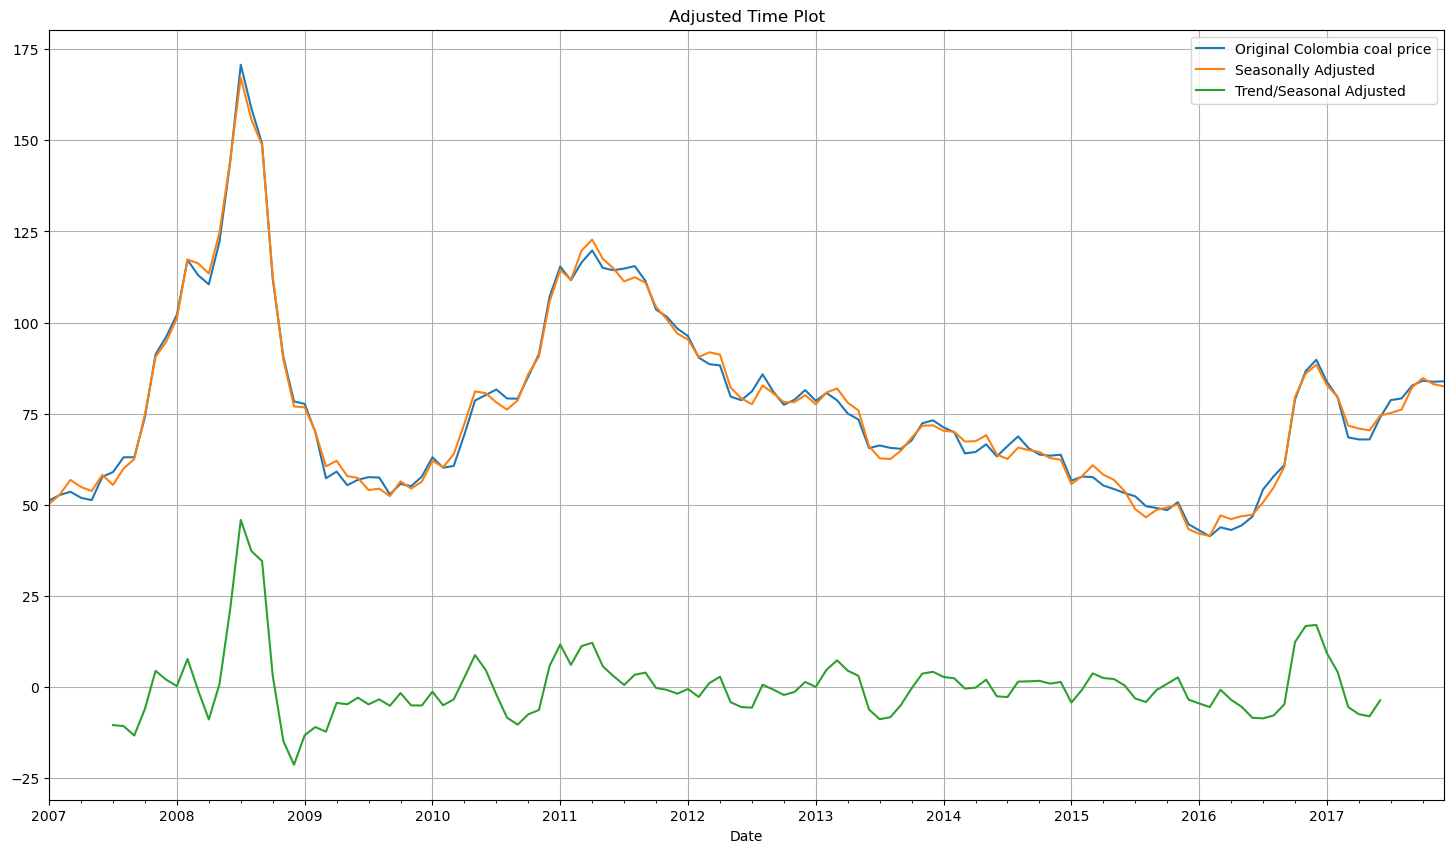

In [150]:
df["Colombia coal price"].plot(label="Original Colombia coal price")
df['Seasonally Adjusted'] = df['Colombia coal price'] - cls_decomposition.seasonal
df["Seasonally Adjusted"].plot(label="Seasonally Adjusted")
df["Trend/Seasonal Adjusted"] = df["Colombia coal price"] - cls_decomposition.seasonal- cls_decomposition.trend
df["Trend/Seasonal Adjusted"].plot(label="Trend/Seasonal Adjusted")
plt.legend();
plt.title("Adjusted Time Plot");

Text(0.5, 1.0, 'Commodity Index')

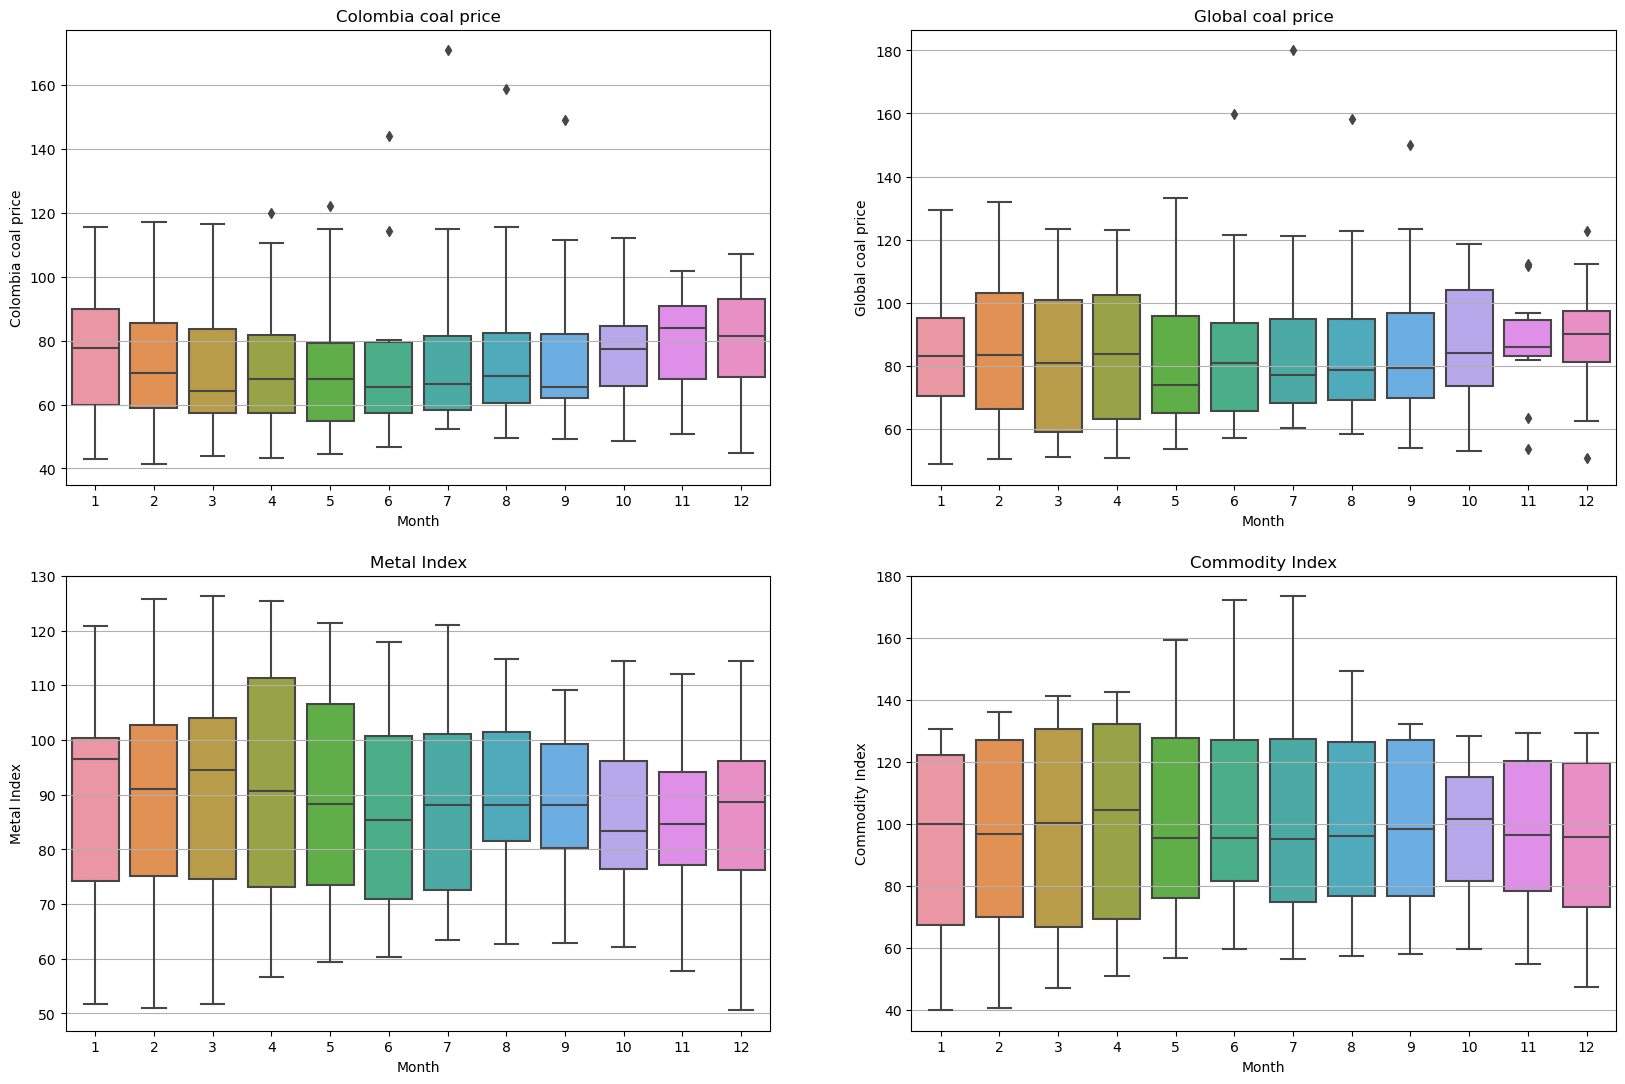

In [151]:
fig3,ax3 = plt.subplots(2,2,figsize=(20,13))
sns.boxplot(data=df, x='Month', y='Colombia coal price',ax=ax3[0][0]).set_title("Colombia coal price")
sns.boxplot(data=df, x='Month', y='Global coal price',ax=ax3[0][1]).set_title("Global coal price")
sns.boxplot(data=df, x='Month', y='Metal Index',ax=ax3[1][0]).set_title("Metal Index")
sns.boxplot(data=df, x='Month', y='Commodity Index',ax=ax3[1][1]).set_title("Commodity Index")

Text(0.5, 1.0, 'Non-Fuel Index')

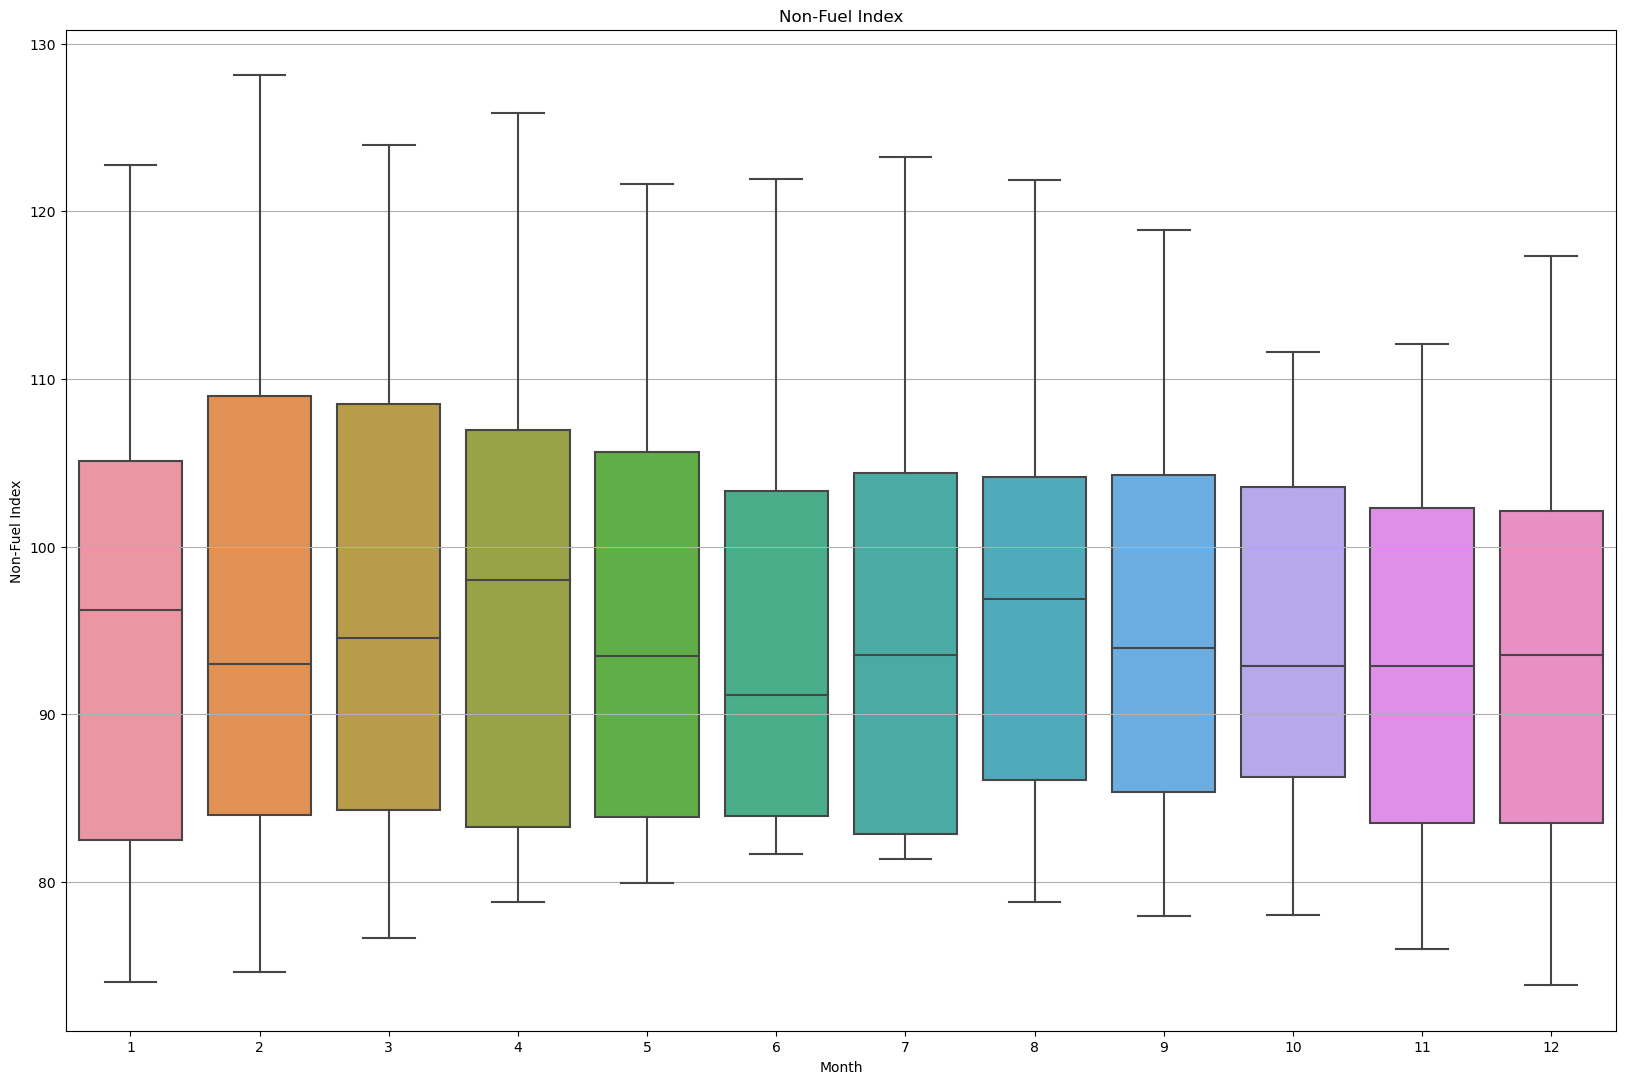

In [152]:
fig3,ax3 = plt.subplots(figsize=(20,13))
sns.boxplot(data=df, x='Month', y='Non-Fuel Index',ax=ax3).set_title("Non-Fuel Index")


In [153]:
def calculate_whiskers(attribute,time,perspective):
    Q1=df.loc[df[perspective] == time, attribute].quantile(0.25)
    Q3=df.loc[df[perspective] == time, attribute].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    return Upper_Whisker,Lower_Whisker

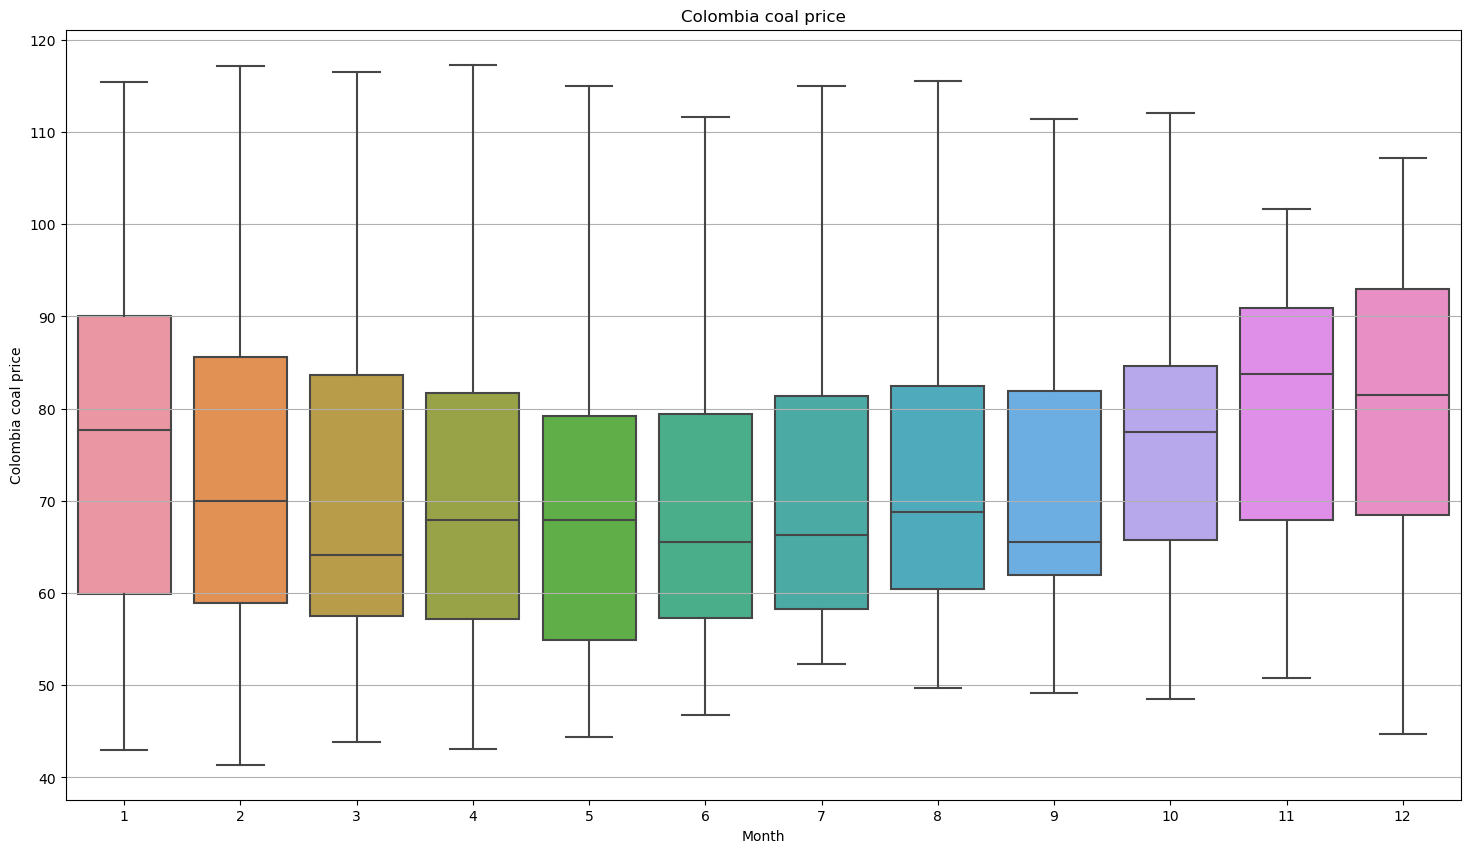

In [154]:
#For the target value "Colombia coal price"
df.sort_values(by=['Colombia coal price'],inplace=True)
months = [4,5,6,7,8,9]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Colombia coal price",month,"Month")
            if(df['Colombia coal price'][ind] > Upper_Whisker):
                df.replace(df['Colombia coal price'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Colombia coal price'][ind] < Lower_Whisker):
                df.replace(df['Colombia coal price'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue      
ax = sns.boxplot(data=df, x='Month', y='Colombia coal price').set_title("Colombia coal price")

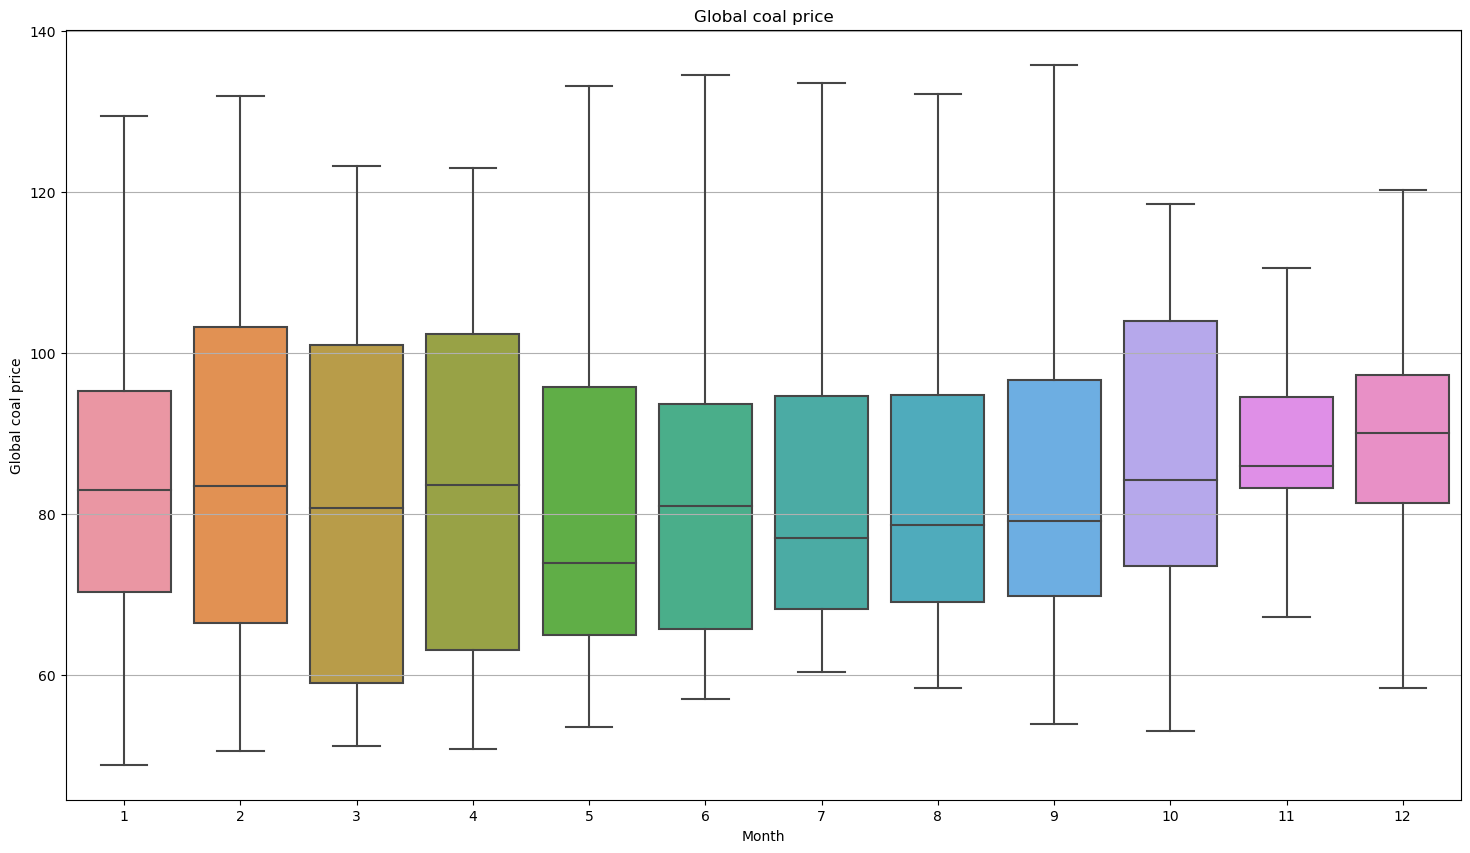

In [155]:
df.sort_values(by=['Global coal price'],inplace=True)
months = [6,7,8,9,11,12]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Global coal price",month,"Month")
            if(df['Global coal price'][ind] > Upper_Whisker):
                df.replace(df['Global coal price'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Global coal price'][ind] < Lower_Whisker):
                df.replace(df['Global coal price'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue      
ax = sns.boxplot(data=df, x='Month', y='Global coal price').set_title("Global coal price")

Text(0.5, 1.0, 'Global coal price')

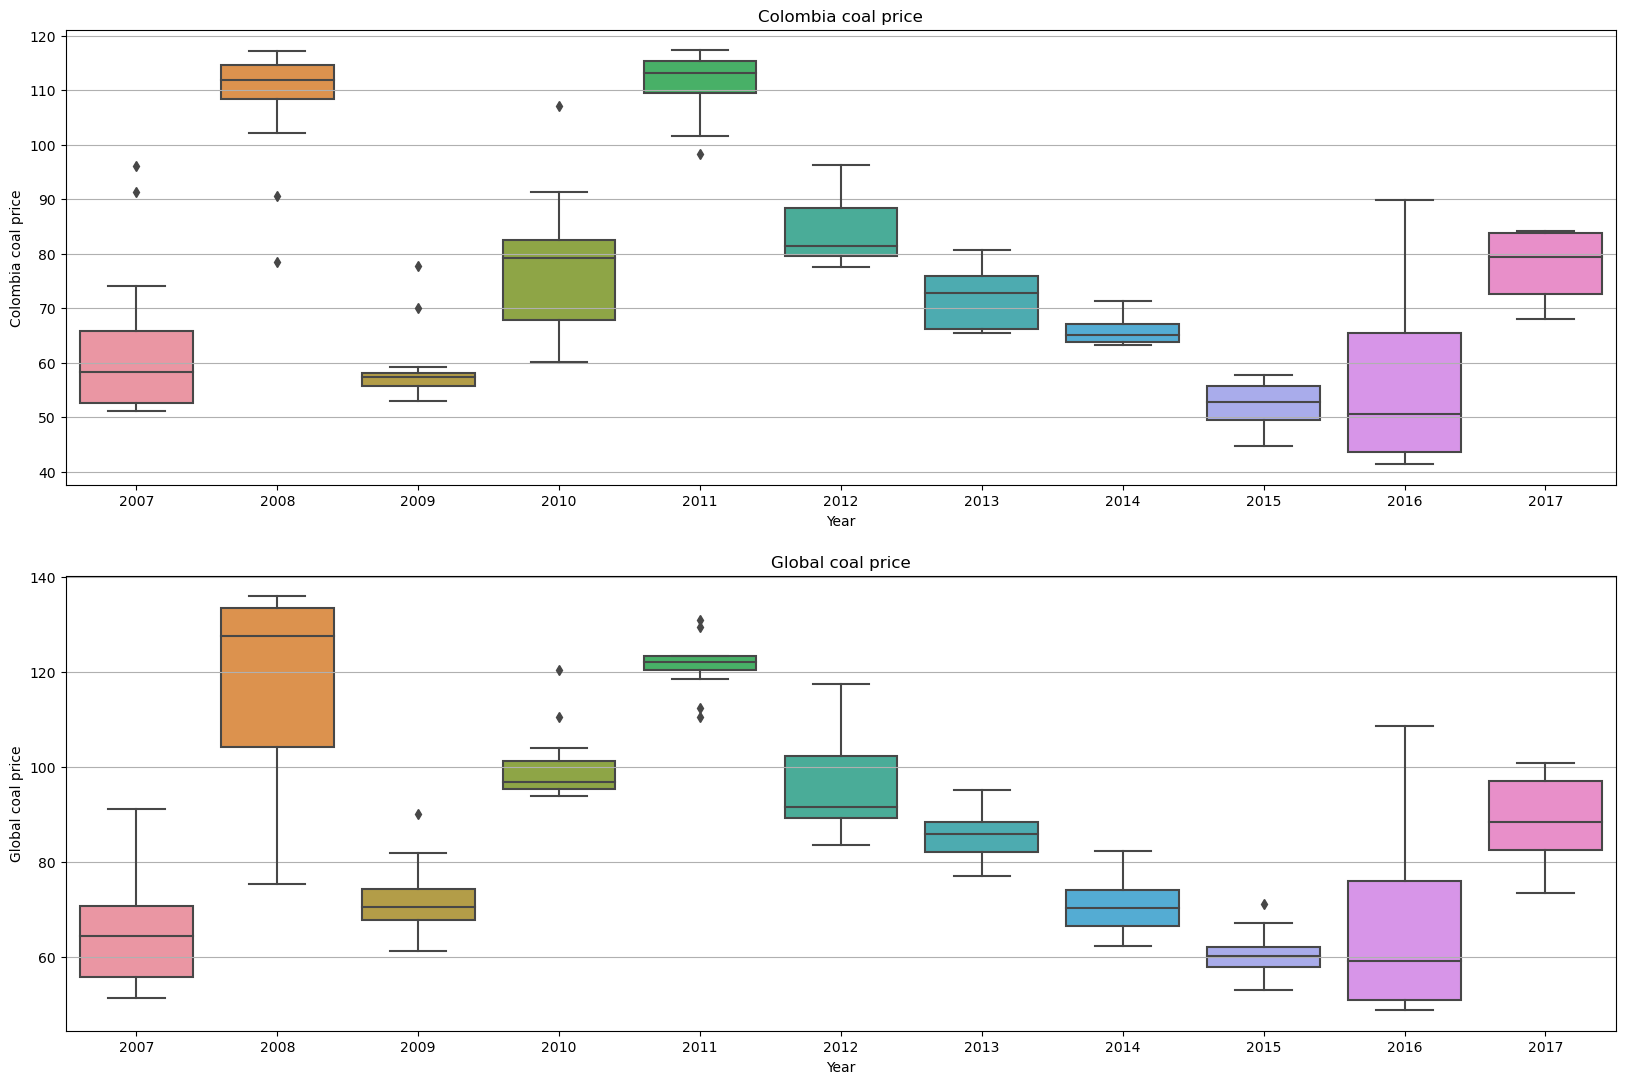

In [156]:
fig3,ax3 = plt.subplots(2, figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Colombia coal price',ax=ax3[0]).set_title("Colombia coal price")
sns.boxplot(data=df, x='Year', y='Global coal price',ax=ax3[1]).set_title("Global coal price")

Text(0.5, 1.0, 'Non-Fuel Index')

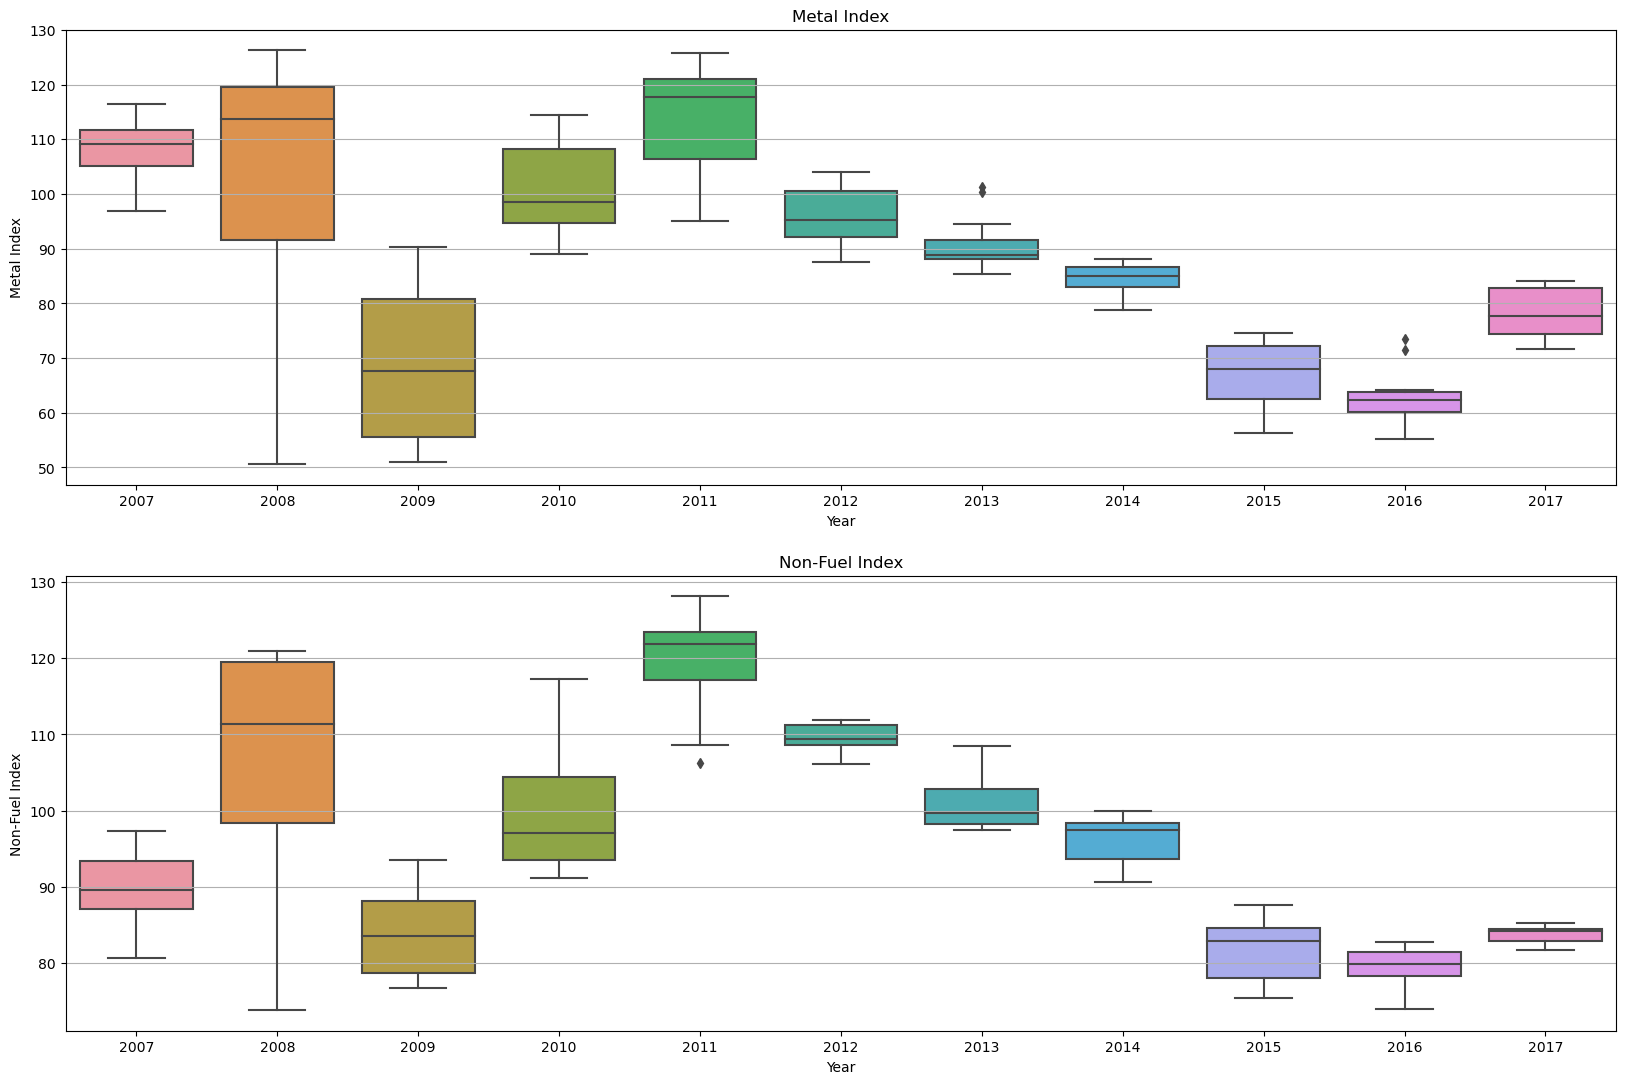

In [157]:
fig3,ax3 = plt.subplots(2, figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Metal Index',ax=ax3[0]).set_title("Metal Index")
sns.boxplot(data=df, x='Year', y='Non-Fuel Index',ax=ax3[1]).set_title("Non-Fuel Index")

Text(0.5, 1.0, 'Commodity Index')

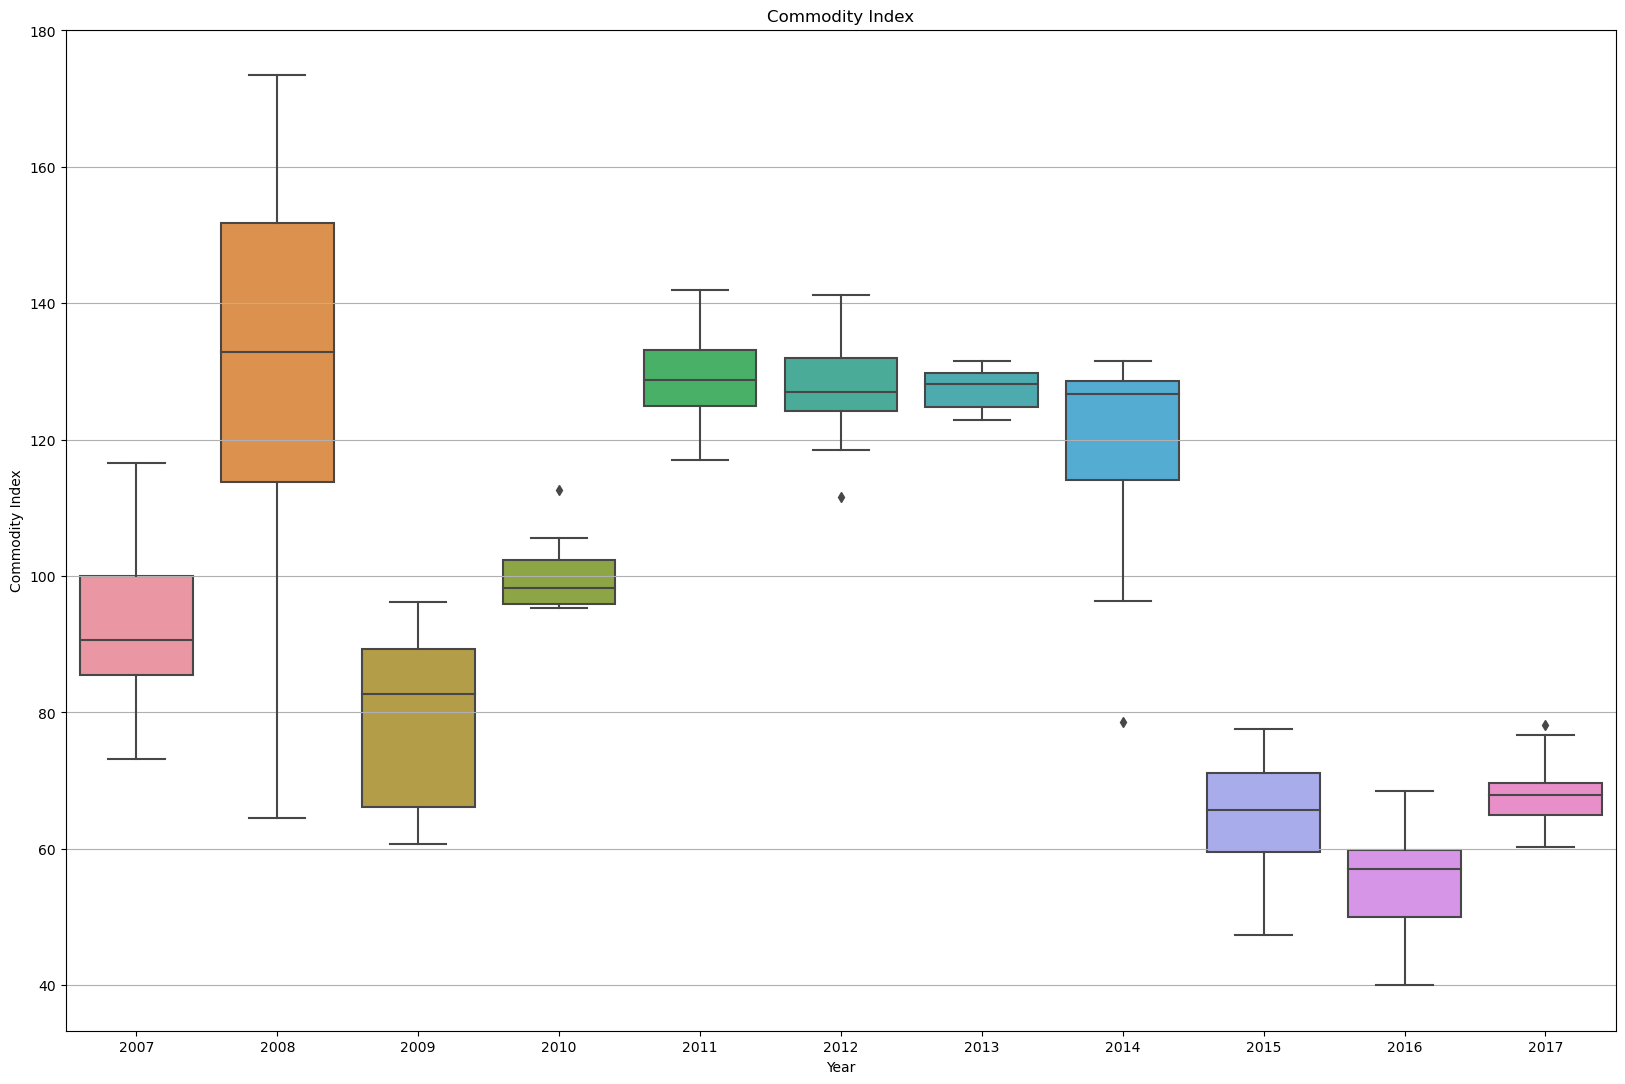

In [158]:
fig3,ax3 = plt.subplots(figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Commodity Index',ax=ax3).set_title("Commodity Index")

In [159]:
years = [2007,2008,2009,2010,2011]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Colombia coal price",year,"Year")
            if(df['Colombia coal price'][ind] > Upper_Whisker):
                df.replace(df['Colombia coal price'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Colombia coal price'][ind] < Lower_Whisker):
                df.replace(df['Colombia coal price'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

In [160]:
years = [2009,2010,2011,2015]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Global coal price",year,"Year")
            if(df['Global coal price'][ind] > Upper_Whisker):
                df.replace(df['Global coal price'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Global coal price'][ind] < Lower_Whisker):
                df.replace(df['Global coal price'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Global coal price after Outlier Removal')

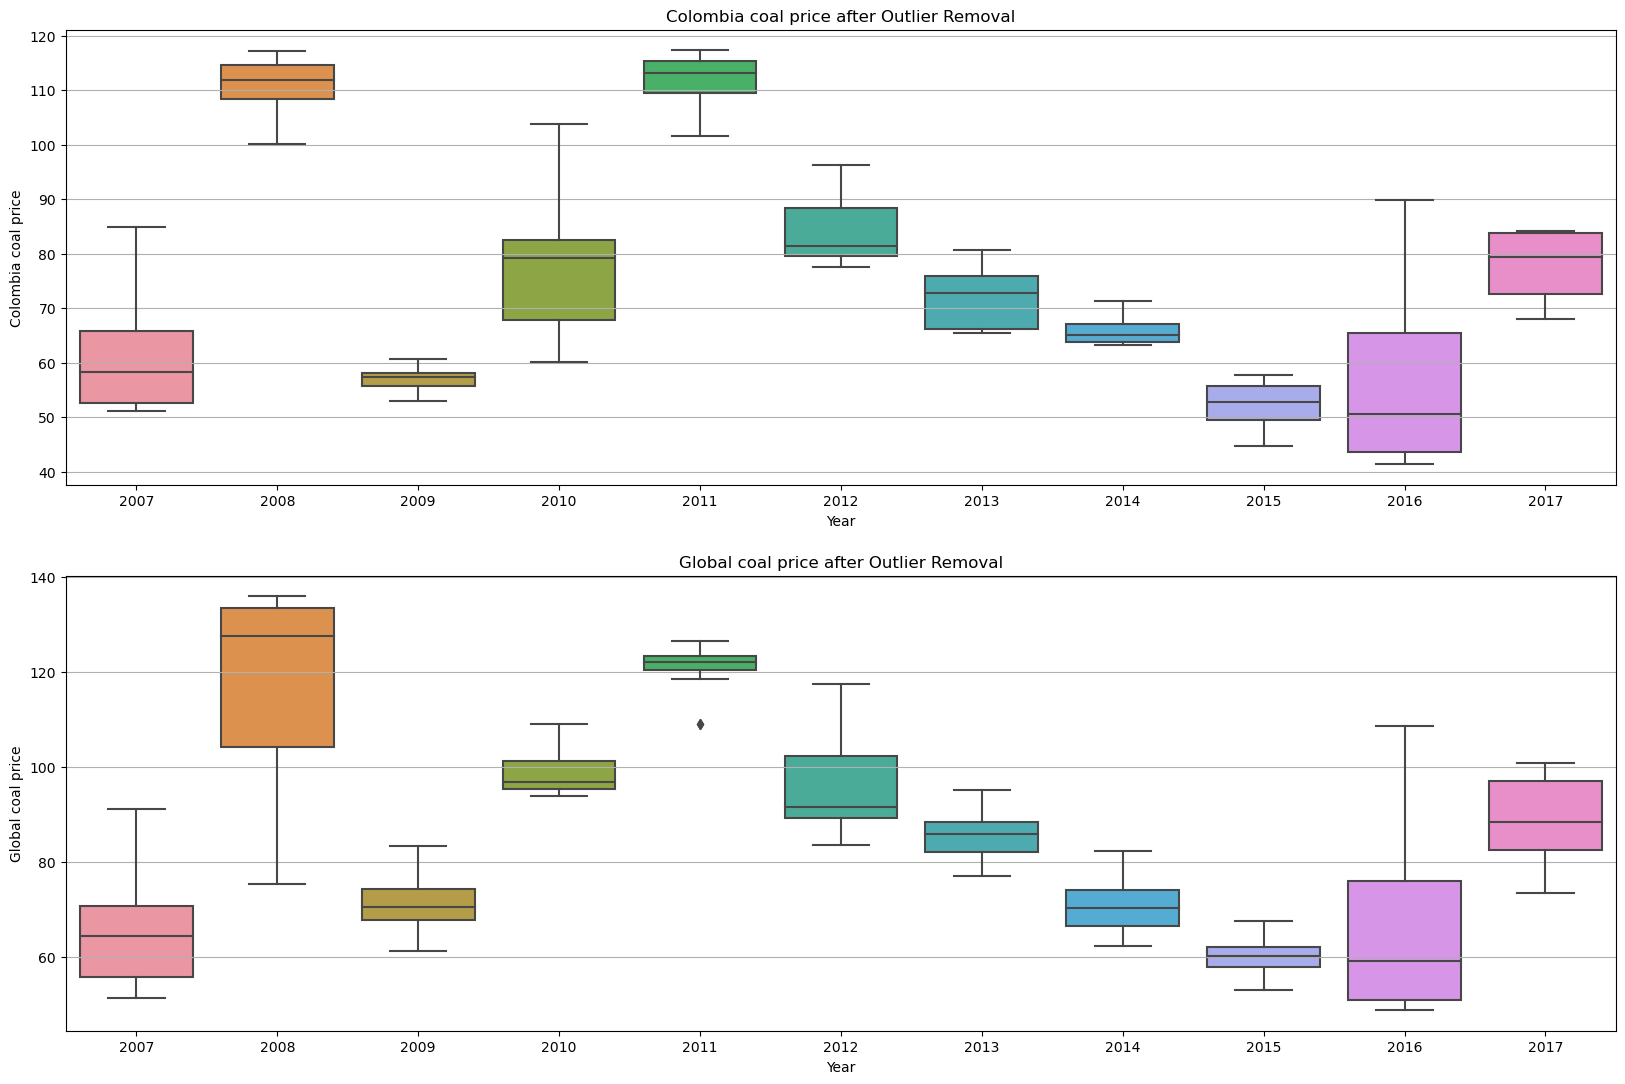

In [161]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Colombia coal price',ax=ax3[0]).set_title("Colombia coal price after Outlier Removal")
sns.boxplot(data=df, x='Year', y='Global coal price',ax=ax3[1]).set_title("Global coal price after Outlier Removal")

In [162]:
years = [2013,2016]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Metal Index",year,"Year")
            if(df['Metal Index'][ind] > Upper_Whisker):
                df.replace(df['Metal Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Metal Index'][ind] < Lower_Whisker):
                df.replace(df['Metal Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

In [163]:
years = [2010,2012,2014,2017]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Commodity Index",year,"Year")
            if(df['Commodity Index'][ind] > Upper_Whisker):
                df.replace(df['Commodity Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Commodity Index'][ind] < Lower_Whisker):
                df.replace(df['Commodity Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Commodity Index after Outlier Removal')

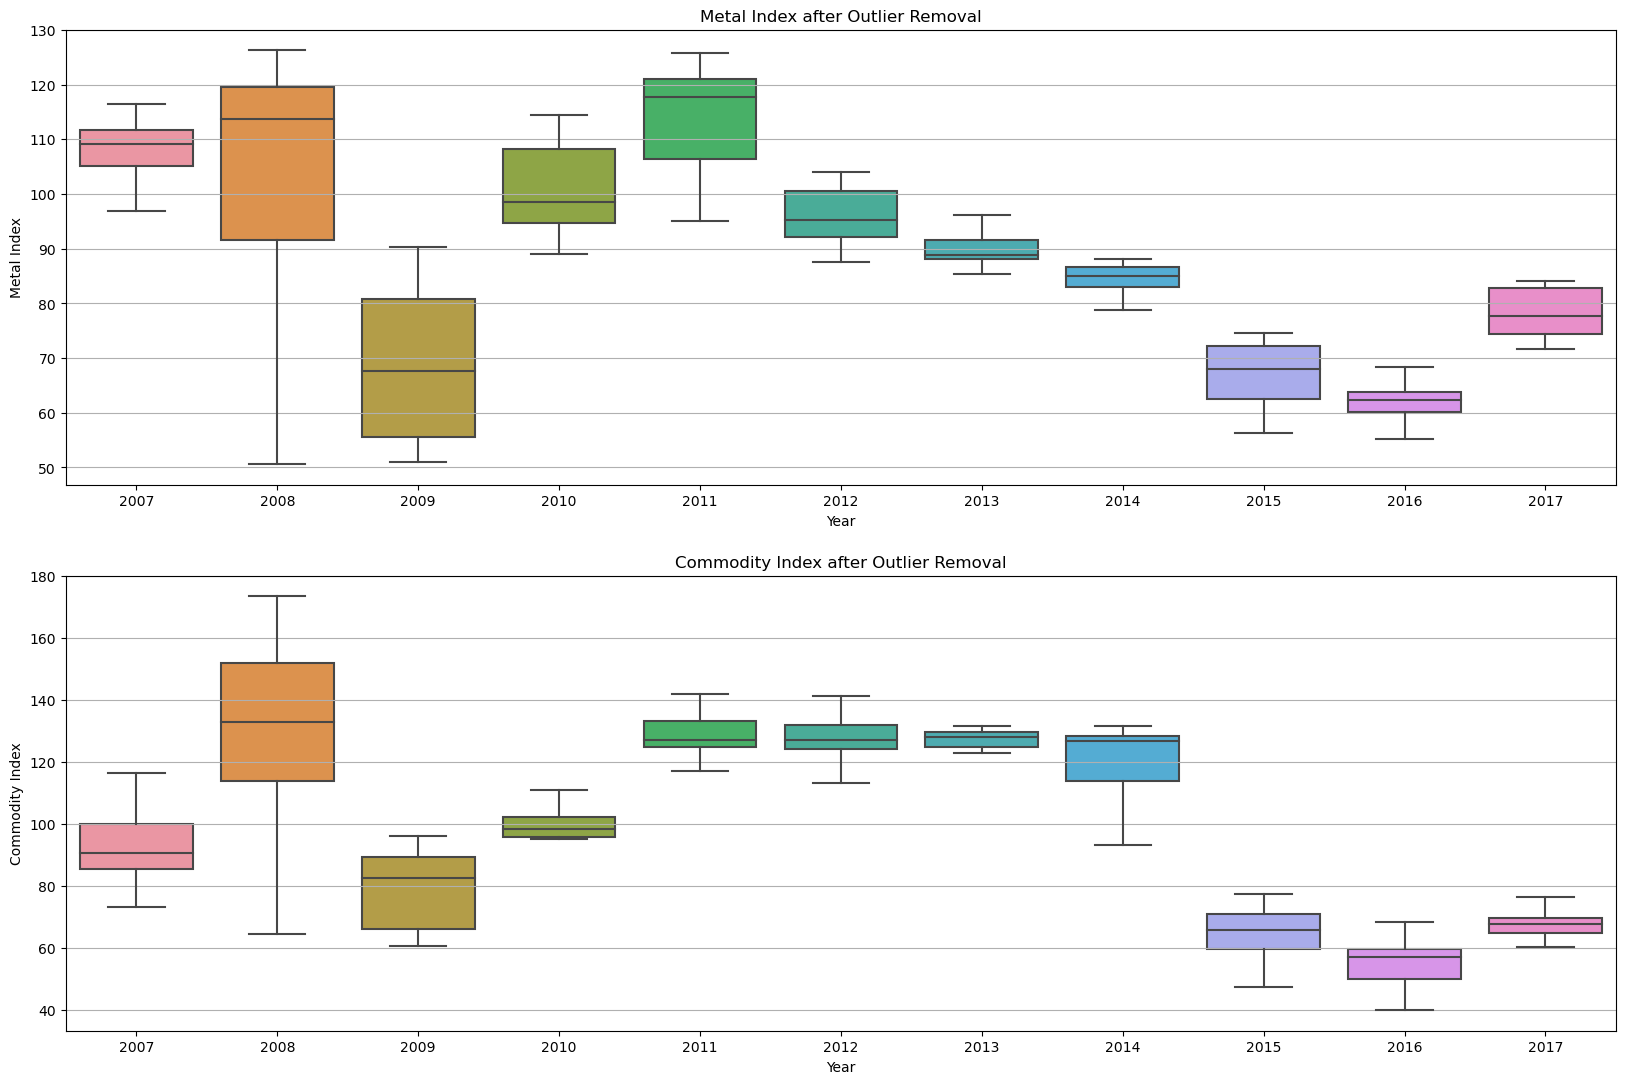

In [164]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Metal Index',ax=ax3[0]).set_title("Metal Index after Outlier Removal")
sns.boxplot(data=df, x='Year', y='Commodity Index',ax=ax3[1]).set_title("Commodity Index after Outlier Removal")

In [165]:
years = [2011]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Non-Fuel Index",year,"Year")
            if(df['Non-Fuel Index'][ind] > Upper_Whisker):
                df.replace(df['Non-Fuel Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Non-Fuel Index'][ind] < Lower_Whisker):
                df.replace(df['Non-Fuel Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Non-Fuel Index after Outlier Removal')

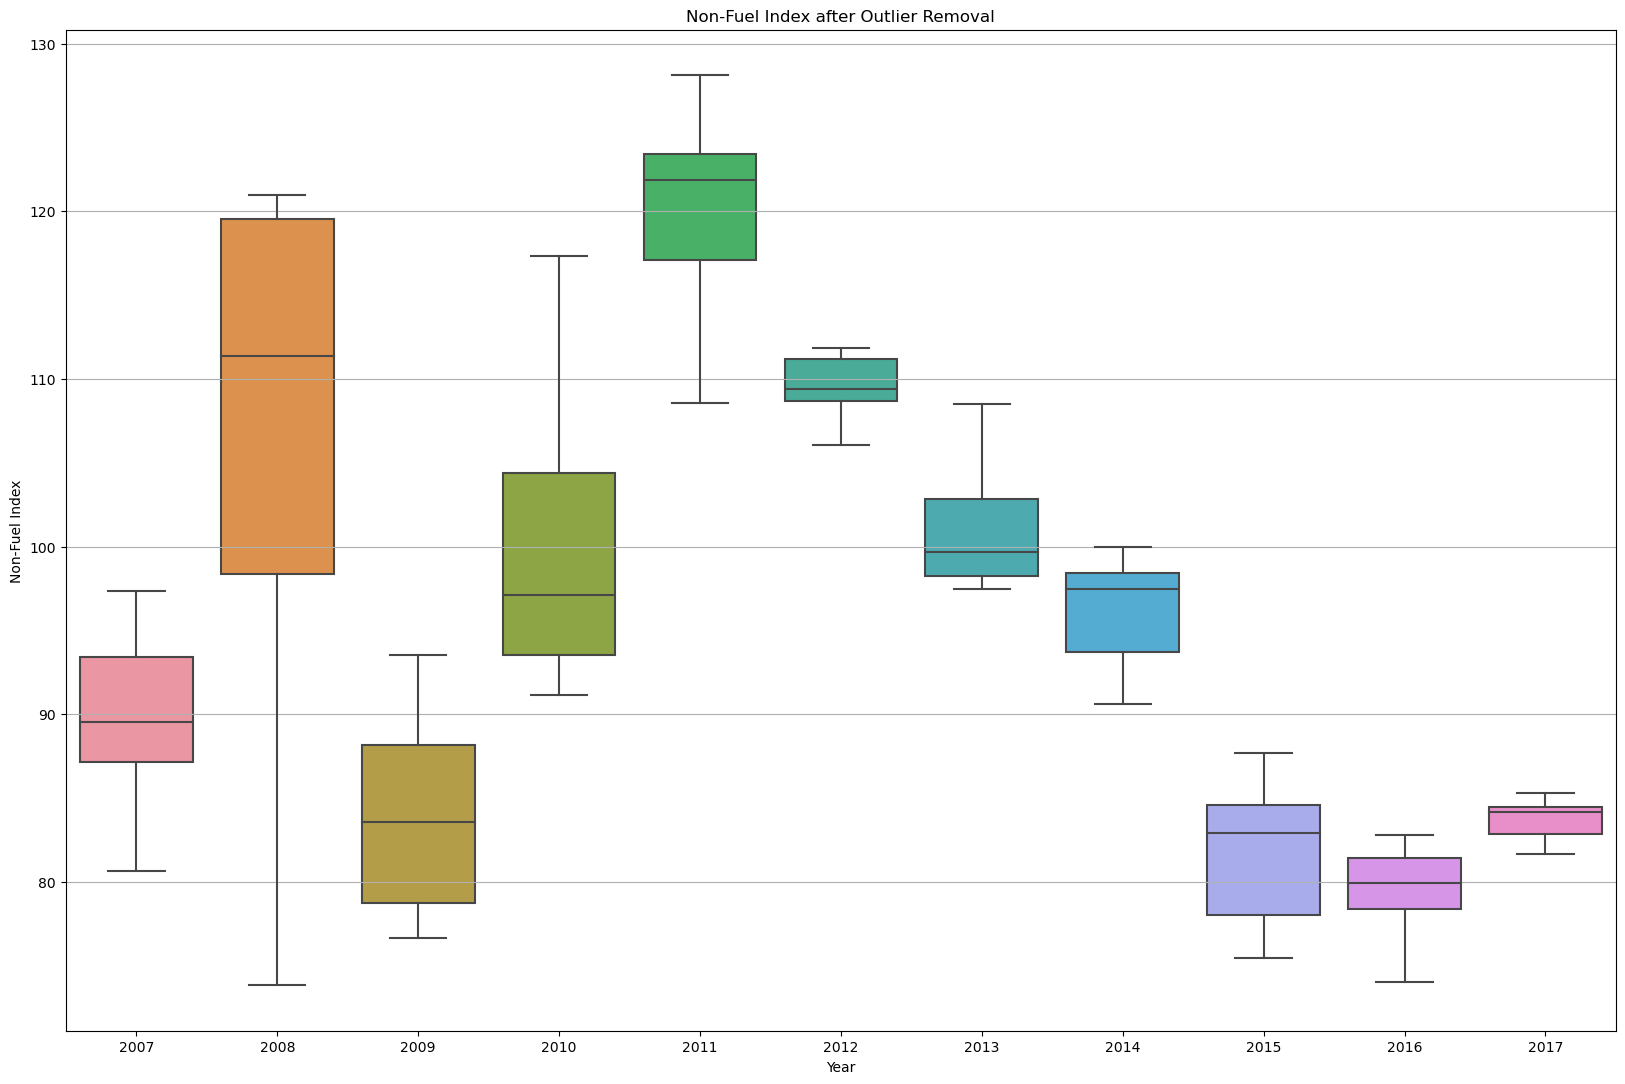

In [170]:
fig3,ax3 = plt.subplots(figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Non-Fuel Index',ax=ax3).set_title("Non-Fuel Index after Outlier Removal")

In [171]:
!pip install scikit-learn


In [172]:
!pip install tensorflow

In [173]:
import os
os.environ['SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL'] = 'True'

In [174]:
!pip install talos

In [175]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers, optimizers
from tensorflow.keras import activations
from keras.regularizers import l2  # 导入L2正则化

import talos
from plot_keras_history import plot_history
import matplotlib as mpl

# mpl.rcParams['figure.figsize'] = (12,10)
mpl.rcParams['axes.grid'] = True

In [176]:
# rearranging dataframe columns to have target column at the first column for easy preprocessing
df_lstm = df[['Colombia coal price', 'Global coal price', 'Metal Index','Non-Fuel Index', 'Commodity Index']]

In [177]:
# checking first 5 rows of dataframe
df_lstm.head()

,Colombia coal price,Global coal price,Metal Index,Non-Fuel Index,Commodity Index
Date,,,,,
2016-01-01,43.01,48.8000,55.21,74.03,40.01
2016-02-01,41.38,50.5000,57.68,74.60,40.78
2015-12-01,44.70,58.3125,56.31,75.47,47.37
2016-04-01,43.12,50.7500,62.00,78.83,51.01
2016-03-01,43.84,51.1000,61.19,76.99,47.20


In [178]:
#converting series to supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [179]:
# storing row values as array
values = df_lstm.values
df_lstm.dtypes

Colombia coal price    float64
Global coal price      float64
Metal Index            float64
Non-Fuel Index         float64
Commodity Index        float64
dtype: object

In [180]:
# Scaling full data using the MinMaxScaler, since all the column values are float
# variables that are measured at different scales do not contribute equally to the model fitting 
# and might end up creating a bias. Thus, to deal with this potential problem, feature-wise normalization 
# such as MinMax Scaling is usually used prior to model fitting
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(values)

# changing data to supervised data as described above
reframed_data = series_to_supervised(data_scaled, 1,1)

In [181]:
# checking head of supervised data
reframed_data.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.021471,0.000000,0.060558,0.003501,0.000000,0.000000,0.019533,0.093217,0.014004,0.005771
2,0.000000,0.019533,0.093217,0.014004,0.005771,0.043733,0.109298,0.075102,0.030035,0.055164
3,0.043733,0.109298,0.075102,0.030035,0.055164,0.022920,0.022405,0.150337,0.091948,0.082446
4,0.022920,0.022405,0.150337,0.091948,0.082446,0.032405,0.026427,0.139627,0.058043,0.053890
5,0.032405,0.026427,0.139627,0.058043,0.053890,0.129223,0.028610,0.610869,0.125299,0.248838


In [182]:
reframed_data.shape

(131, 10)

In [183]:
#only keep data till time t; t+1, t2, ...all till the end can be dropped, since we only need to predict the target variable at time t
reframed_data.drop(['var2(t)','var3(t)', 'var4(t)', 'var5(t)'], axis=1, inplace=True)

In [184]:
# storing dataframe as array 
values = reframed_data.values

In [185]:
# training_split=287
train = values[:91, :]
test = values[-40:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features] for inputs to LSTM models
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(91, 1, 5) (91,) (40, 1, 5) (40,)


In [186]:
# Helper functions
def make_predictions(model):
  # prediction on the test data
  yhat = model.predict(test_X)
  # reversing the scaling for original and predicted values so that we can compare values normally as coal prices
  test_X_reshape = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  # invert scaling for forecasted values
  inv_yhat = np.concatenate((yhat, test_X_reshape[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  # invert scaling for actual values
  test_y_reshape = test_y.reshape((len(test_y), 1))
  inv_y = np.concatenate((test_y_reshape, test_X_reshape[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]

  return inv_yhat, inv_y

def plot_performance(history, model_name):

  plt.subplots(figsize=(18, 6))

  plt.subplot(1, 3, 1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(model_name+" "+'Model Loss-MAE', fontsize = 12)
  plt.ylabel('Mean Absolute Loss (MAE)', fontsize = 10)
  plt.xlabel('Epoch', fontsize = 10)
  plt.legend(["Train:{:.3f}".format(history.history["loss"][-1]), "Validation:{:.3f}".format(history.history["val_loss"][-1])], fontsize = 10)

  plt.subplot(1, 3, 2)
  plt.plot(history.history['MSE'])
  plt.plot(history.history['val_MSE'])
  plt.title(model_name+" "+'Model Performance Metric-MSE', fontsize = 12)
  plt.ylabel('Mean Squared Error (MSE)', fontsize = 10)
  plt.xlabel('Epoch', fontsize = 10)
  plt.legend(["Train:{:.3f}".format(history.history["MSE"][-1]), "Validation:{:.3f}".format(history.history["val_MSE"][-1])], fontsize =10, )

  plt.tight_layout()
  plt.show()

In [187]:
tf.keras.backend.clear_session()

In [188]:
# LSTM network design: We use a small 2-layered LSTM model with 1 dropout layer to start with
model2 = Sequential()



# LSTM Block
model2.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True)) 
model2.add(LSTM(64, return_sequences = False)) 
# Dense and Output Layer
model2.add(Dense(32))
model2.add(Dropout(0.25))
model2.add(Dense(10))
model2.add(Dense(1))

opt = optimizers.Adam(learning_rate=0.0004)
model2.compile(loss='MAE', optimizer=opt, metrics=["MSE"])

# viewing model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             17920     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 53365 (208.46 KB)
Trainable params: 53365 

In [189]:
# fit network
history2 = model2.fit(train_X, train_y, epochs=200, batch_size=10, validation_split=0.2, verbose=2, shuffle=True)


Epoch 1/200
8/8 - 4s - loss: 0.2386 - MSE: 0.0787 - val_loss: 0.4067 - val_MSE: 0.1870 - 4s/epoch - 521ms/step
Epoch 2/200
8/8 - 0s - loss: 0.1602 - MSE: 0.0424 - val_loss: 0.2963 - val_MSE: 0.1094 - 50ms/epoch - 6ms/step
Epoch 3/200
8/8 - 0s - loss: 0.1042 - MSE: 0.0206 - val_loss: 0.2255 - val_MSE: 0.0619 - 46ms/epoch - 6ms/step
Epoch 4/200
8/8 - 0s - loss: 0.1035 - MSE: 0.0175 - val_loss: 0.1761 - val_MSE: 0.0376 - 46ms/epoch - 6ms/step
Epoch 5/200
8/8 - 0s - loss: 0.1072 - MSE: 0.0177 - val_loss: 0.2045 - val_MSE: 0.0499 - 46ms/epoch - 6ms/step
Epoch 6/200
8/8 - 0s - loss: 0.1015 - MSE: 0.0167 - val_loss: 0.2276 - val_MSE: 0.0624 - 45ms/epoch - 6ms/step
Epoch 7/200
8/8 - 0s - loss: 0.0945 - MSE: 0.0162 - val_loss: 0.2320 - val_MSE: 0.0650 - 50ms/epoch - 6ms/step
Epoch 8/200
8/8 - 0s - loss: 0.0970 - MSE: 0.0170 - val_loss: 0.2298 - val_MSE: 0.0632 - 48ms/epoch - 6ms/step
Epoch 9/200
8/8 - 0s - loss: 0.0962 - MSE: 0.0165 - val_loss: 0.2199 - val_MSE: 0.0571 - 48ms/epoch - 6ms/step
E

Epoch 75/200
8/8 - 0s - loss: 0.0686 - MSE: 0.0083 - val_loss: 0.1142 - val_MSE: 0.0257 - 56ms/epoch - 7ms/step
Epoch 76/200
8/8 - 0s - loss: 0.0661 - MSE: 0.0079 - val_loss: 0.1214 - val_MSE: 0.0261 - 64ms/epoch - 8ms/step
Epoch 77/200
8/8 - 0s - loss: 0.0665 - MSE: 0.0082 - val_loss: 0.1142 - val_MSE: 0.0252 - 60ms/epoch - 7ms/step
Epoch 78/200
8/8 - 0s - loss: 0.0626 - MSE: 0.0077 - val_loss: 0.1169 - val_MSE: 0.0268 - 53ms/epoch - 7ms/step
Epoch 79/200
8/8 - 0s - loss: 0.0704 - MSE: 0.0090 - val_loss: 0.1174 - val_MSE: 0.0269 - 53ms/epoch - 7ms/step
Epoch 80/200
8/8 - 0s - loss: 0.0666 - MSE: 0.0082 - val_loss: 0.1151 - val_MSE: 0.0258 - 48ms/epoch - 6ms/step
Epoch 81/200
8/8 - 0s - loss: 0.0603 - MSE: 0.0068 - val_loss: 0.1153 - val_MSE: 0.0254 - 54ms/epoch - 7ms/step
Epoch 82/200
8/8 - 0s - loss: 0.0654 - MSE: 0.0083 - val_loss: 0.1144 - val_MSE: 0.0251 - 57ms/epoch - 7ms/step
Epoch 83/200
8/8 - 0s - loss: 0.0663 - MSE: 0.0082 - val_loss: 0.1209 - val_MSE: 0.0260 - 59ms/epoch - 7

Epoch 148/200
8/8 - 0s - loss: 0.0637 - MSE: 0.0077 - val_loss: 0.1080 - val_MSE: 0.0246 - 45ms/epoch - 6ms/step
Epoch 149/200
8/8 - 0s - loss: 0.0623 - MSE: 0.0076 - val_loss: 0.1082 - val_MSE: 0.0244 - 45ms/epoch - 6ms/step
Epoch 150/200
8/8 - 0s - loss: 0.0658 - MSE: 0.0085 - val_loss: 0.1091 - val_MSE: 0.0244 - 49ms/epoch - 6ms/step
Epoch 151/200
8/8 - 0s - loss: 0.0596 - MSE: 0.0073 - val_loss: 0.1065 - val_MSE: 0.0242 - 54ms/epoch - 7ms/step
Epoch 152/200
8/8 - 0s - loss: 0.0613 - MSE: 0.0073 - val_loss: 0.1097 - val_MSE: 0.0243 - 46ms/epoch - 6ms/step
Epoch 153/200
8/8 - 0s - loss: 0.0614 - MSE: 0.0071 - val_loss: 0.1080 - val_MSE: 0.0242 - 46ms/epoch - 6ms/step
Epoch 154/200
8/8 - 0s - loss: 0.0659 - MSE: 0.0079 - val_loss: 0.1078 - val_MSE: 0.0245 - 46ms/epoch - 6ms/step
Epoch 155/200
8/8 - 0s - loss: 0.0612 - MSE: 0.0070 - val_loss: 0.1070 - val_MSE: 0.0241 - 47ms/epoch - 6ms/step
Epoch 156/200
8/8 - 0s - loss: 0.0646 - MSE: 0.0078 - val_loss: 0.1151 - val_MSE: 0.0249 - 47ms/

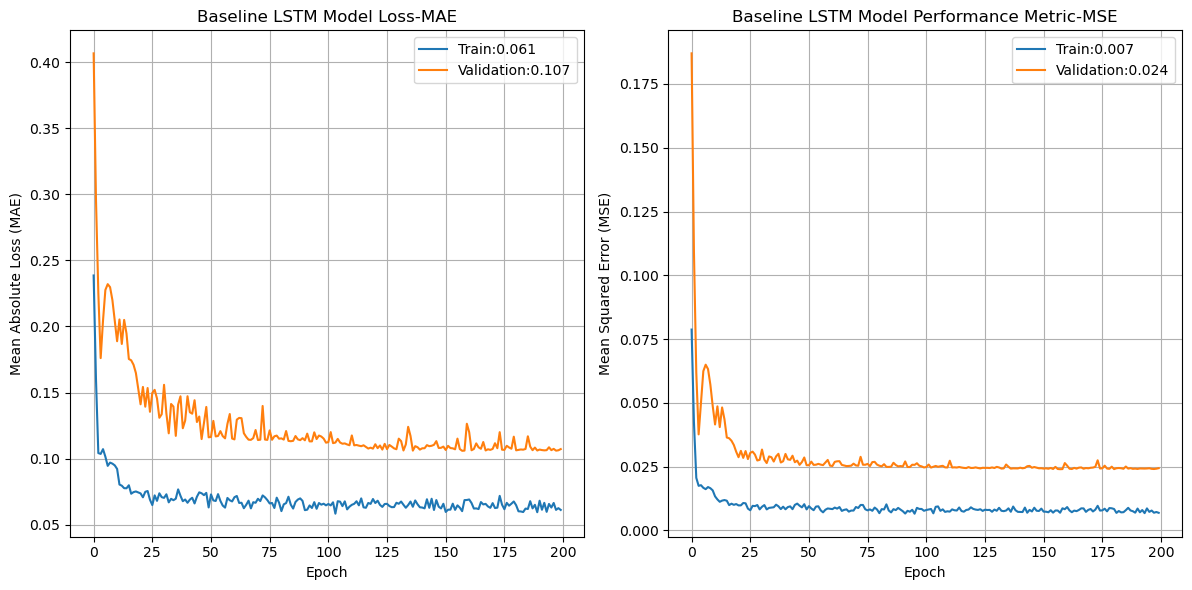

In [190]:
# Plotting model performance
plot_performance(history2, "Baseline LSTM")

In [191]:
predicted_values2, groundtruth= make_predictions(model2)
df['forecast_lstm'] = np.zeros(df.shape[0])
predictions = np.zeros(df.shape[0])
predictions[-40:]=predicted_values2
df['forecast_lstm_baseline'] = predictions

2/2 [==============================] - 1s 3ms/step


In [192]:
# calculate RMSE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = np.sqrt(mean_squared_error(groundtruth, predicted_values2))
print('Test RMSE: %.3f' % rmse)

mae = mean_absolute_error(groundtruth, predicted_values2)
print('Test MAE: %.3f' % mae)
print('MSE: %.3f'% mean_squared_error(groundtruth, predicted_values2))

Test RMSE: 7.838
Test MAE: 5.559
MSE: 61.432


In [193]:
import sklearn.metrics as sm
print("R^2 score =", round(sm.r2_score(groundtruth, predicted_values2), 2))

R^2 score = 0.75


In [194]:
model2.save("baseline_lstm_model.h5")

3/3 [==============================] - 0s 1ms/step
DatetimeIndex(['2016-01-01', '2016-02-01', '2015-12-01', '2016-04-01',
               '2016-03-01', '2007-01-01', '2007-02-01', '2015-10-01',
               '2016-05-01', '2015-11-01',
               ...
               '2011-09-01', '2011-03-01', '2011-01-01', '2011-02-01',
               '2008-02-01', '2008-05-01', '2008-09-01', '2008-08-01',
               '2008-06-01', '2008-07-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)


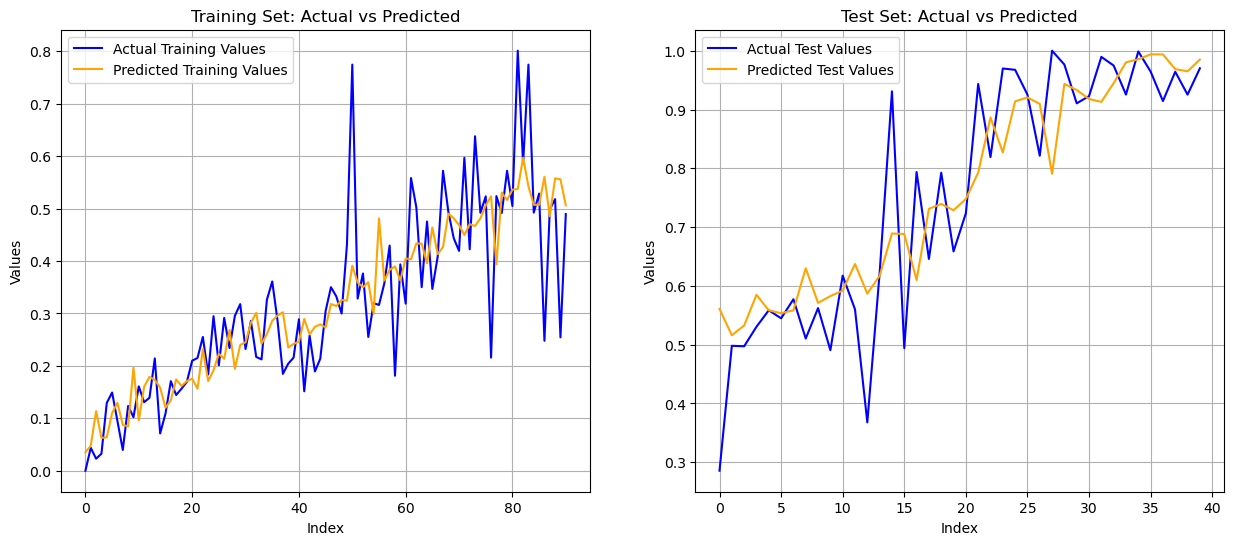

In [195]:
pred_test_y = model2.predict(test_X)
pred_train_y = model2.predict(train_X)
#绘制训练集的实际值和预测值
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(train[:, -1], label='Actual Training Values', color='blue')  # 实际值
plt.plot(pred_train_y, label='Predicted Training Values', color='orange')  # 预测值
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
print(df.index)

# 绘制测试集的实际值和预测值
plt.subplot(1, 2, 2)
plt.plot(test[:, -1], label='Actual Test Values', color='blue')  # 实际值
plt.plot(pred_test_y, label='Predicted Test Values', color='orange')  # 预测值
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

<Figure size 1200x1000 with 0 Axes>

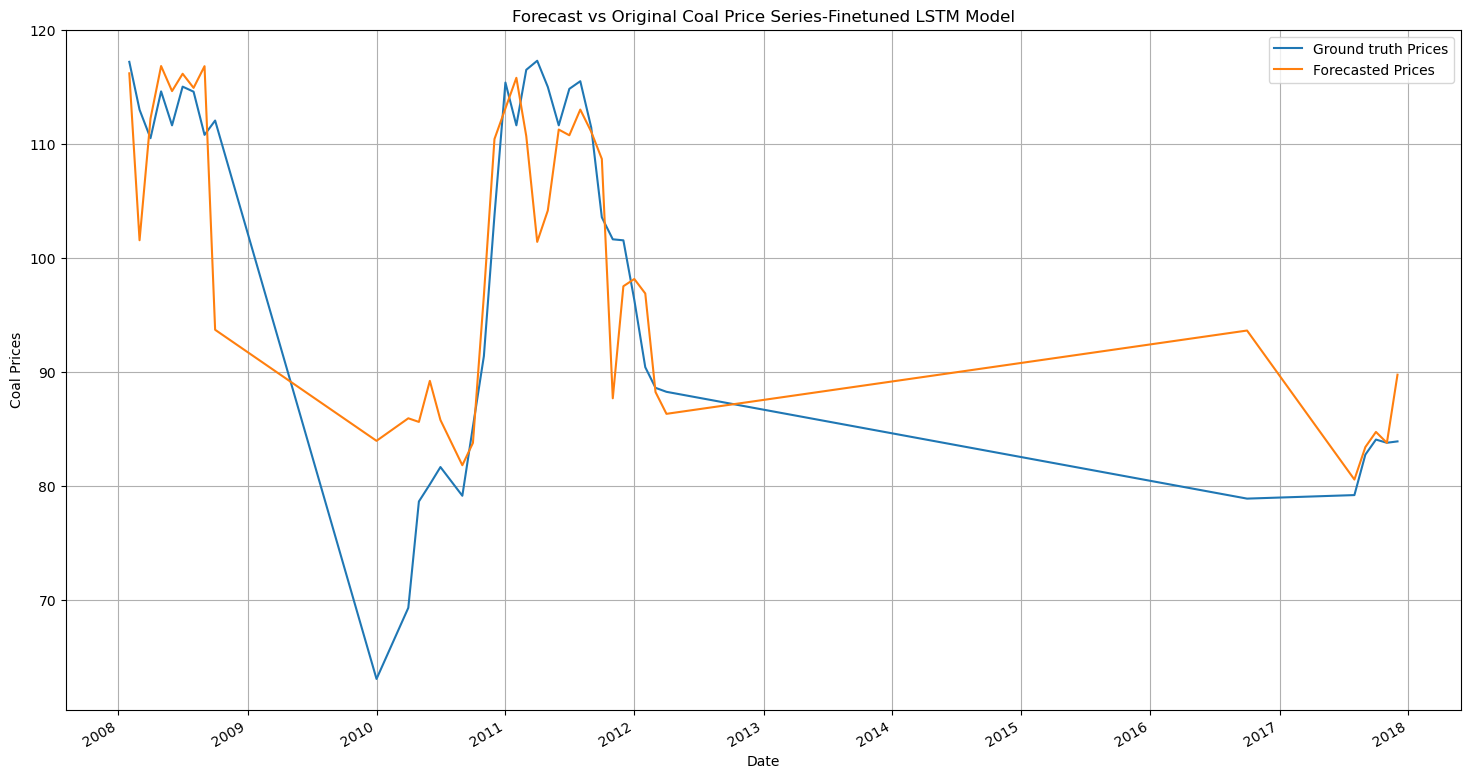

In [196]:
mpl.rcParams['axes.grid'] = True ## Set true for getting grid lines
plt.figure(figsize=(12,10));
df.iloc[-40:][['Colombia coal price','forecast_lstm_baseline']].plot();
plt.title("Forecast vs Original Coal Price Series-Finetuned LSTM Model");
plt.ylabel("Coal Prices")
plt.legend(labels=("Ground truth Prices","Forecasted Prices"))

<Figure size 1200x1000 with 0 Axes>

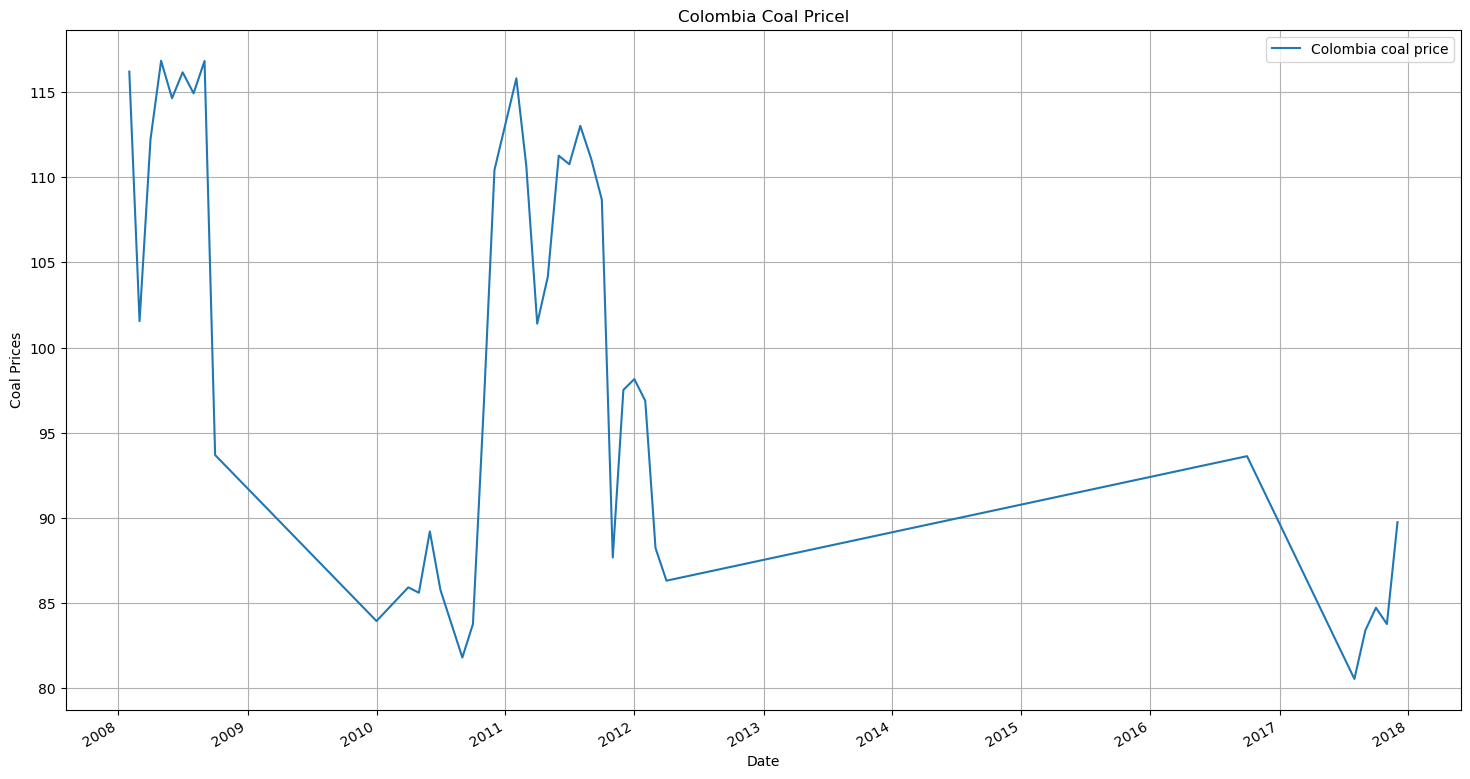

In [203]:
mpl.rcParams['axes.grid'] = True ## Set true for getting grid lines
plt.figure(figsize=(12,10));
df.iloc[-40:][['forecast_lstm_baseline']].plot();
plt.title("Colombia Coal Pricel");
plt.ylabel("Coal Prices")
plt.legend(df[["Colombia coal price"]], loc ="upper right")